In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor

import math
import numpy as np

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import random

from pathlib import Path

## Set path to dir with model projects

In [2]:
projects_path = Path("/home/falaxdb/Repos/minus1/transformer_decoder_training/saved_files/saved_models")

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

dataset_dir = "/home/falaxdb/Repos/minus1/datasets/maestro_v3_split/hands_split_into_seperate_midis"

import transformer_decoder_training.training_helper_functions as helper

Processed dataset (1038/1038): 100%|██████████| 1038/1038 [00:10<00:00, 101.41it/s]


Processed 1038 of 1038 files
The train loader has 241 batches with a size of 32
The model is trained on approximately 7712 sequences
Start training Model with following parameters:
model_project_name: transformer_1.7
model_params: 
  model_topology: Transformer(
  (embedding): Linear(in_features=24, out_features=256, bias=True)
  (pos_emb): SinusoidalPosEmb()
  (blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=256, out_features=1024, bias=True)
        (1): ELU(alpha=1.0)
        (2): Linear(in_features=1024, out_features=256, bias=True)
      )
    )
  )
  (fc_out): Linear(in_features=256, out_features=24, bias=True)
)
  num_emb: 24
  hidden

Epoch: 1, Train loss: 0.216, Val loss: 0.174, Epoch time = 8.295s


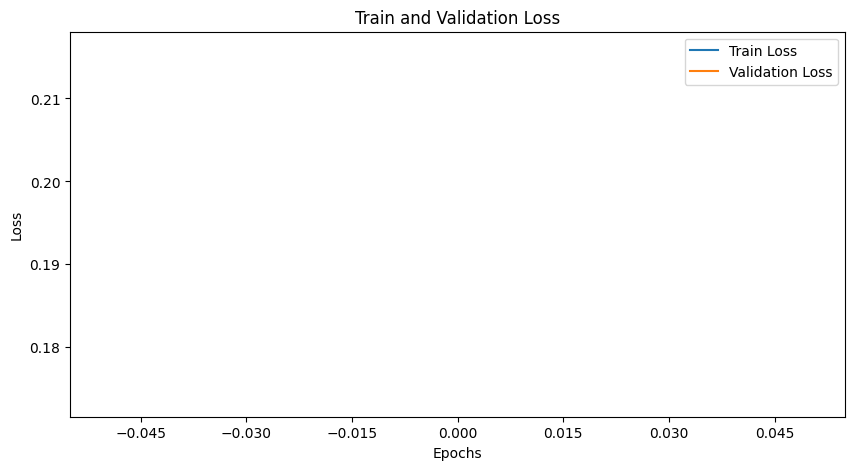

Epoch: 2, Train loss: 0.171, Val loss: 0.167, Epoch time = 8.022s


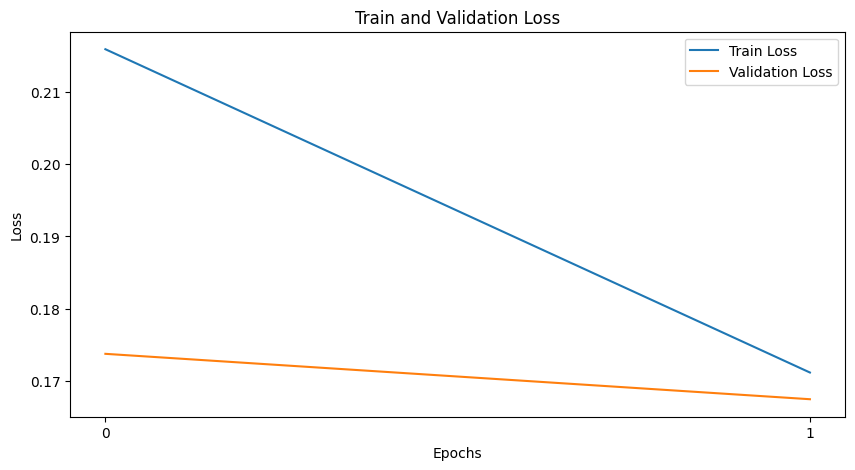

Epoch: 3, Train loss: 0.167, Val loss: 0.165, Epoch time = 7.995s


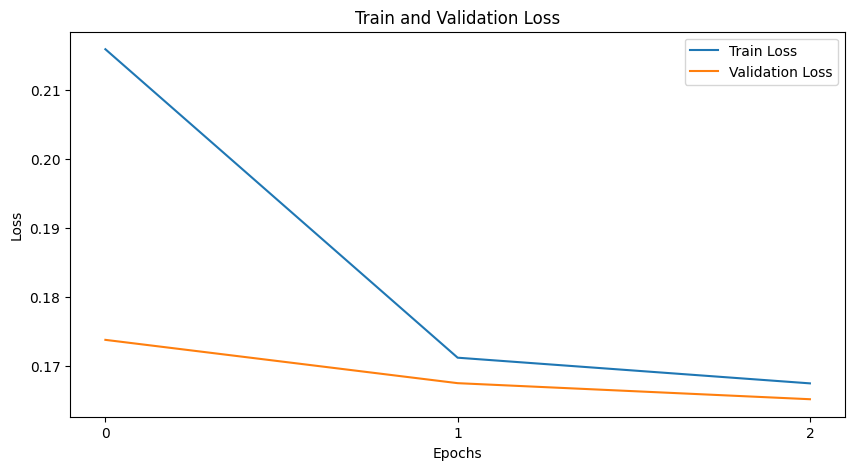

Epoch: 4, Train loss: 0.166, Val loss: 0.164, Epoch time = 7.973s


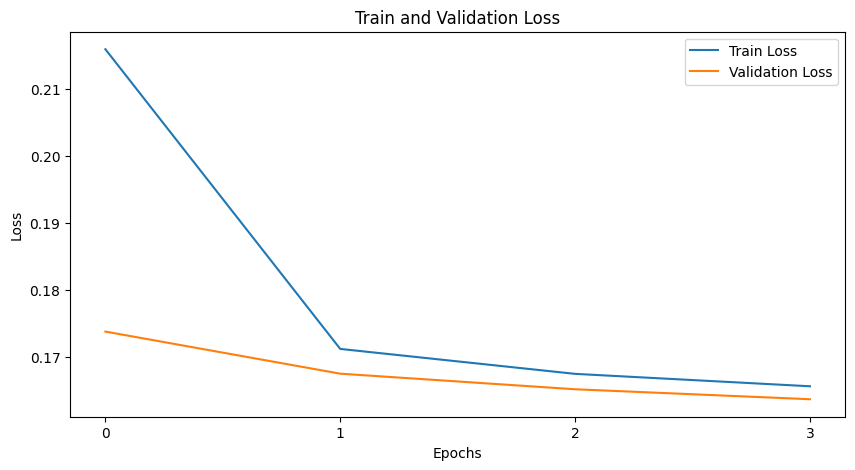

Epoch: 5, Train loss: 0.164, Val loss: 0.162, Epoch time = 8.035s


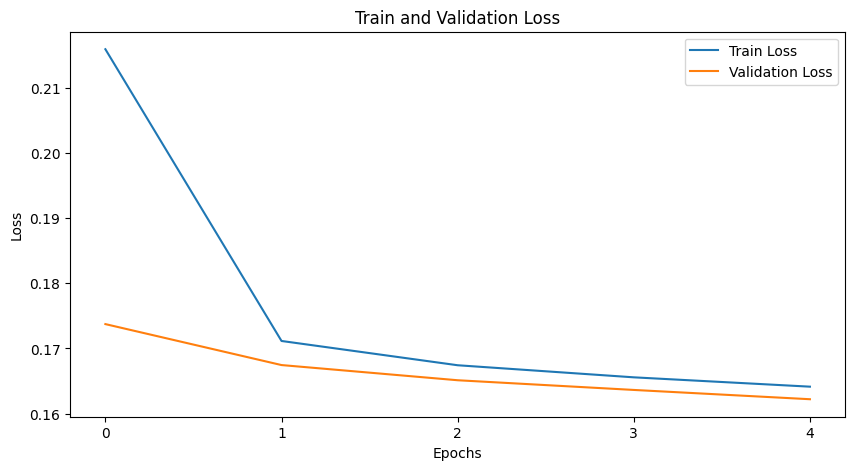

Epoch: 6, Train loss: 0.163, Val loss: 0.161, Epoch time = 8.012s


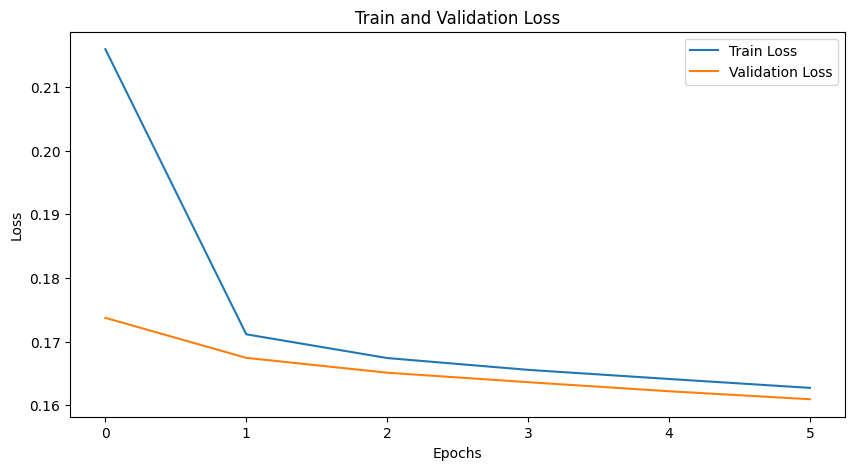

Epoch: 7, Train loss: 0.161, Val loss: 0.159, Epoch time = 8.011s


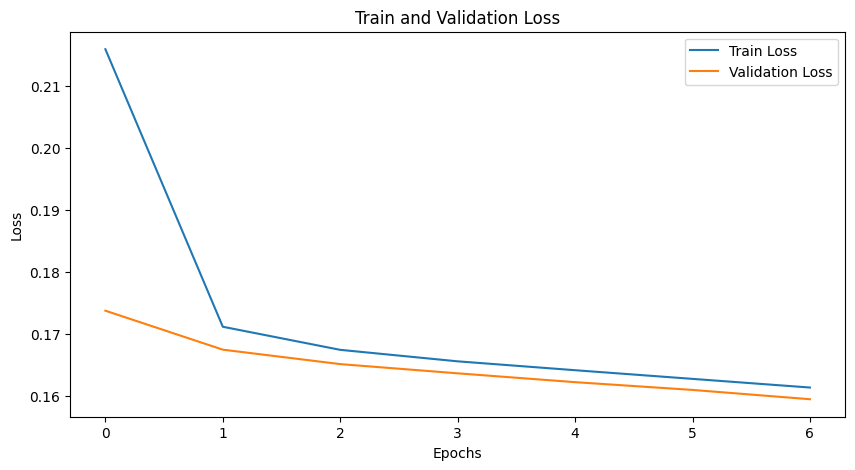

Epoch: 8, Train loss: 0.160, Val loss: 0.158, Epoch time = 8.057s


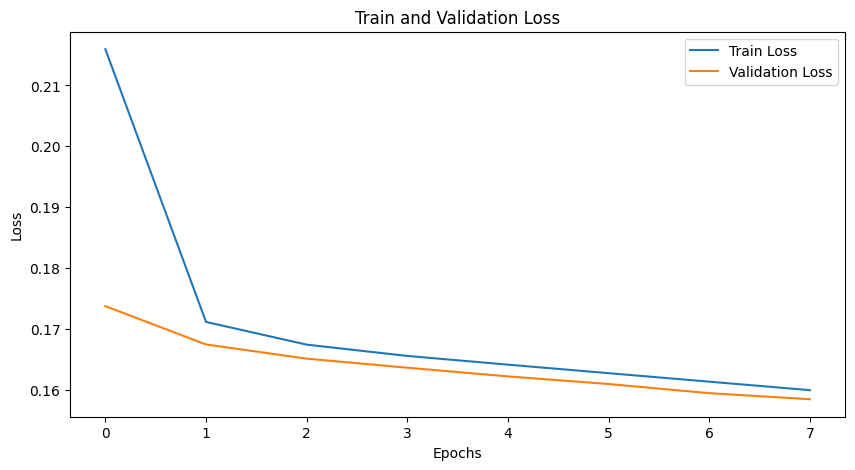

Epoch: 9, Train loss: 0.159, Val loss: 0.157, Epoch time = 8.084s


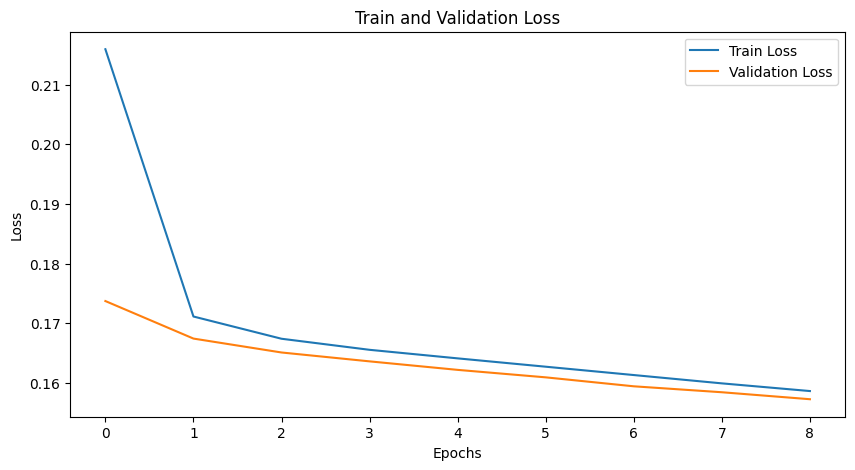

Epoch: 10, Train loss: 0.158, Val loss: 0.156, Epoch time = 8.006s


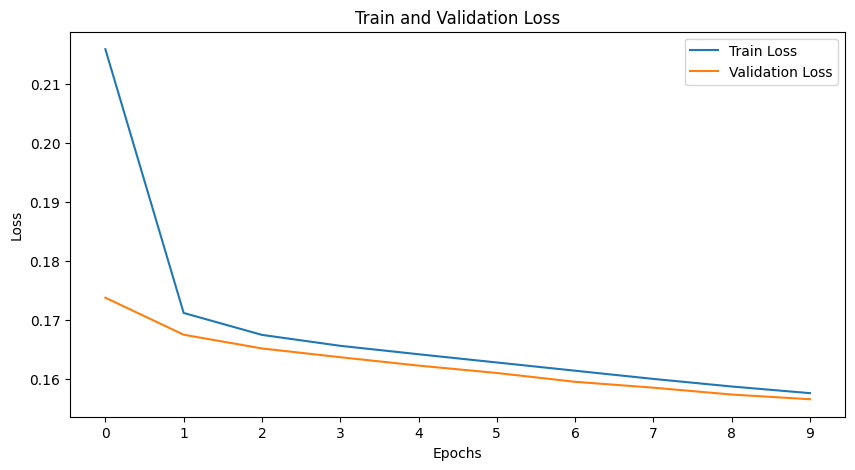

Epoch: 11, Train loss: 0.157, Val loss: 0.155, Epoch time = 8.004s


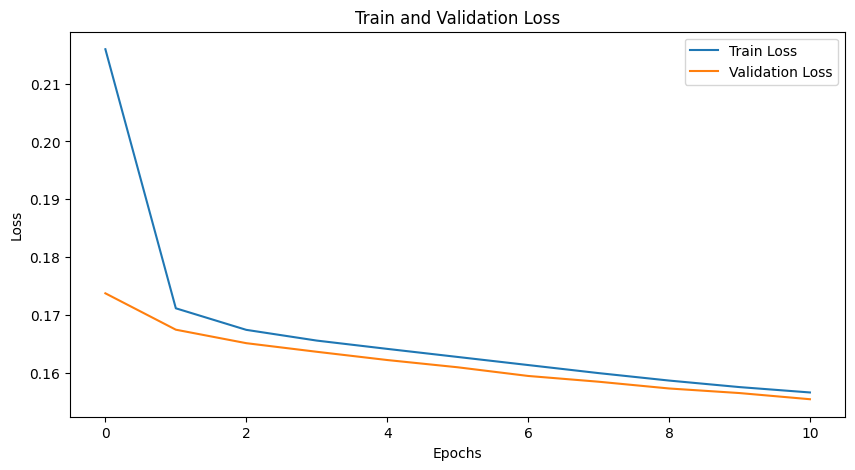

Epoch: 12, Train loss: 0.156, Val loss: 0.155, Epoch time = 8.028s


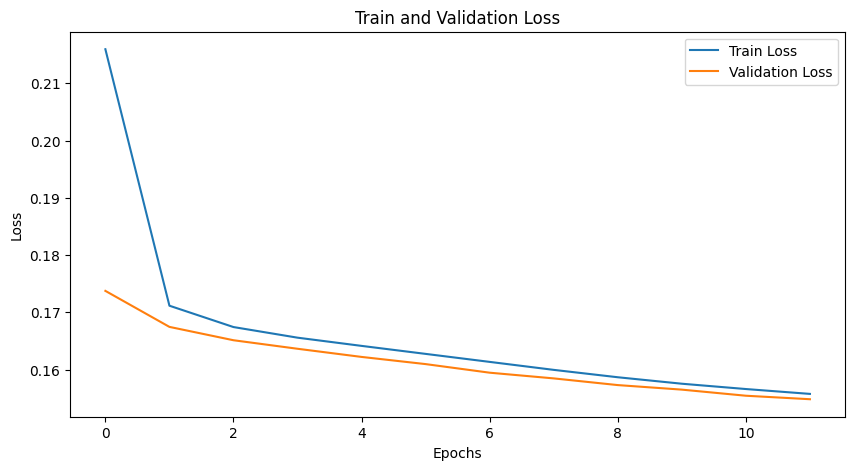

Epoch: 13, Train loss: 0.155, Val loss: 0.154, Epoch time = 8.016s


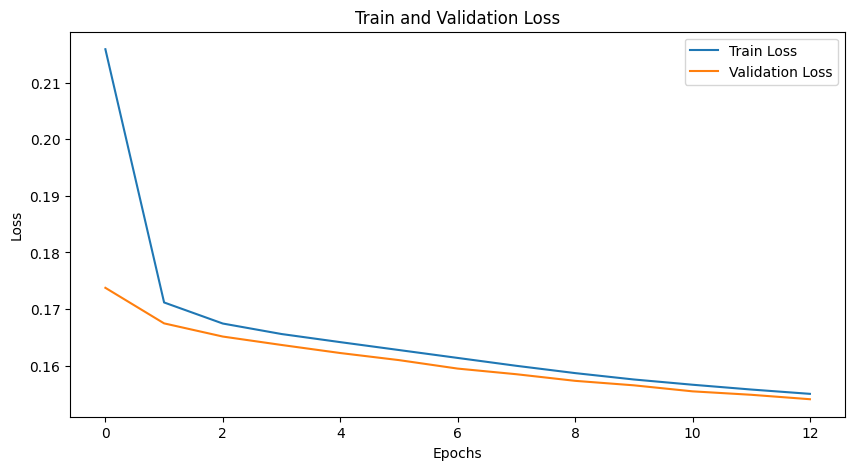

Epoch: 14, Train loss: 0.154, Val loss: 0.153, Epoch time = 8.028s


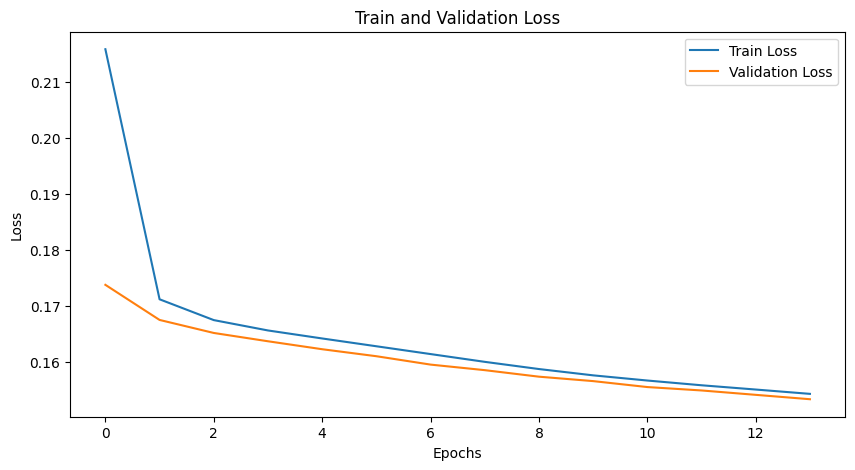

Epoch: 15, Train loss: 0.154, Val loss: 0.153, Epoch time = 8.068s


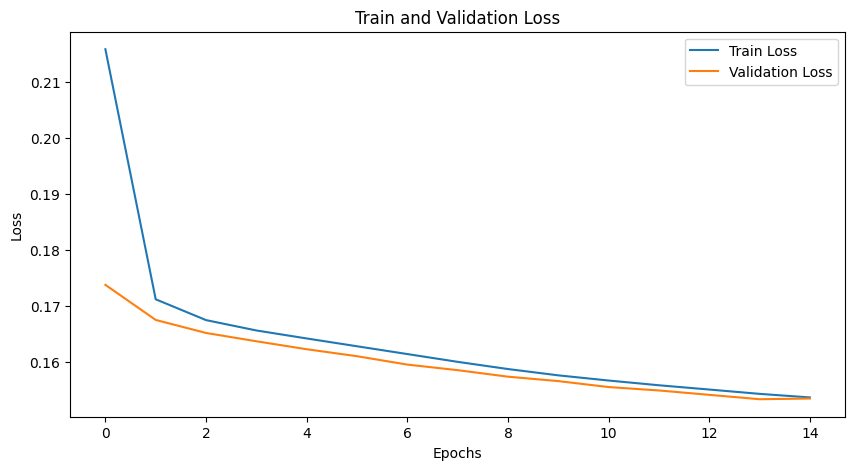

Epoch: 16, Train loss: 0.153, Val loss: 0.152, Epoch time = 8.032s


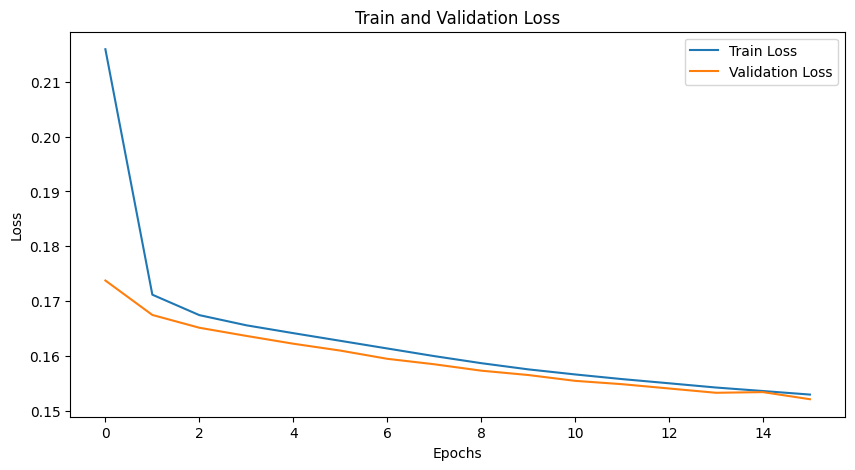

Epoch: 17, Train loss: 0.152, Val loss: 0.151, Epoch time = 8.041s


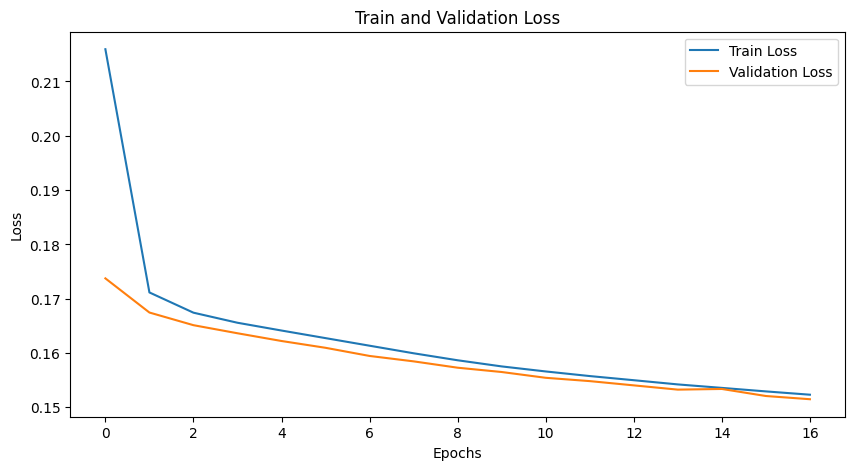

Epoch: 18, Train loss: 0.152, Val loss: 0.151, Epoch time = 8.032s


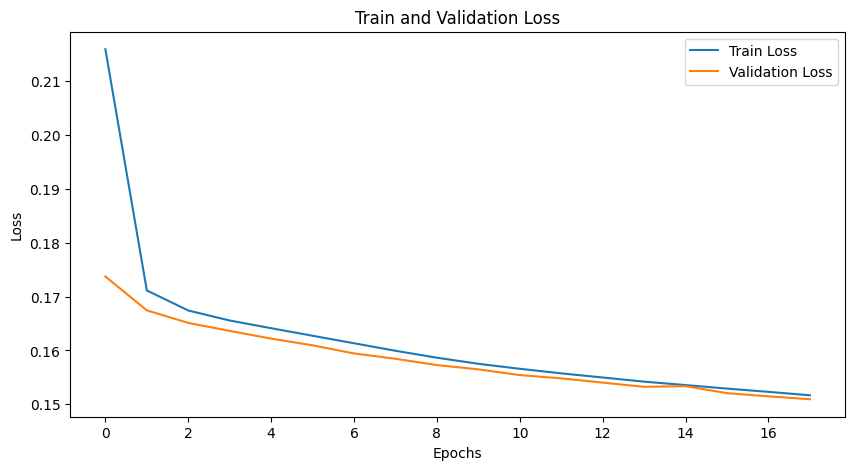

Epoch: 19, Train loss: 0.151, Val loss: 0.150, Epoch time = 8.024s


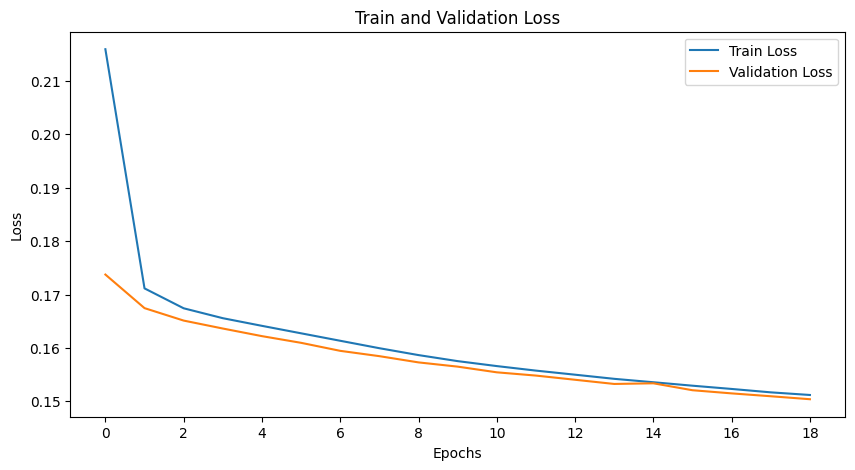

Epoch: 20, Train loss: 0.151, Val loss: 0.150, Epoch time = 8.025s


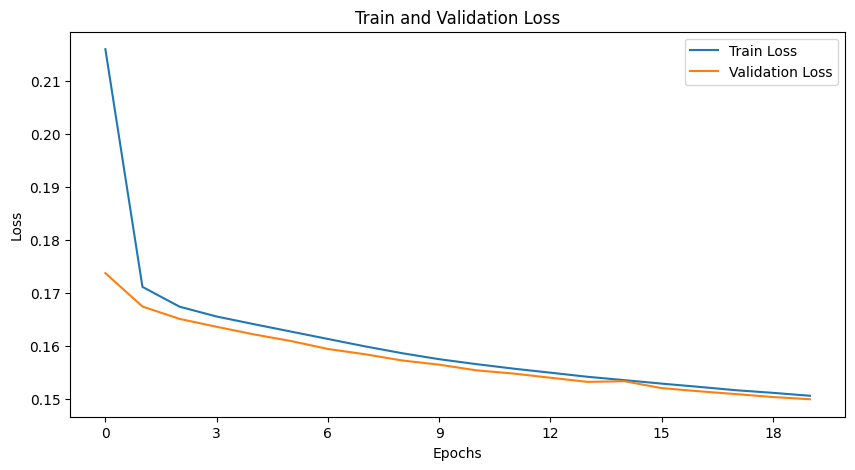

Epoch: 21, Train loss: 0.150, Val loss: 0.150, Epoch time = 8.014s


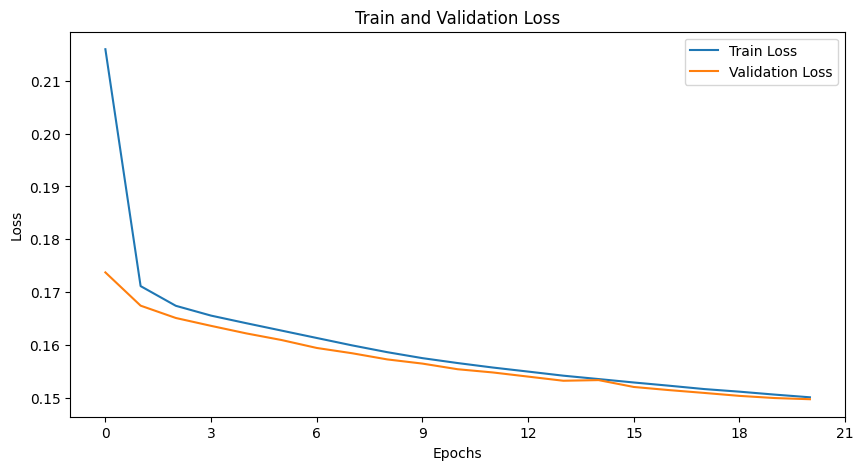

Epoch: 22, Train loss: 0.150, Val loss: 0.149, Epoch time = 8.026s


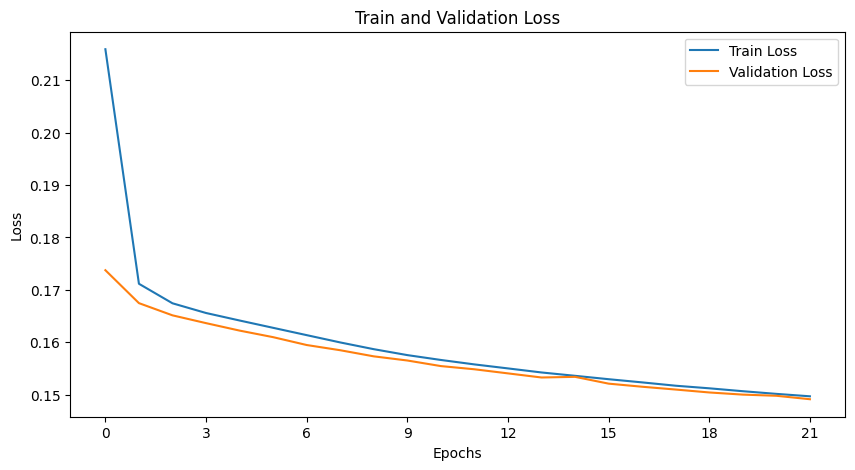

Epoch: 23, Train loss: 0.149, Val loss: 0.149, Epoch time = 8.019s


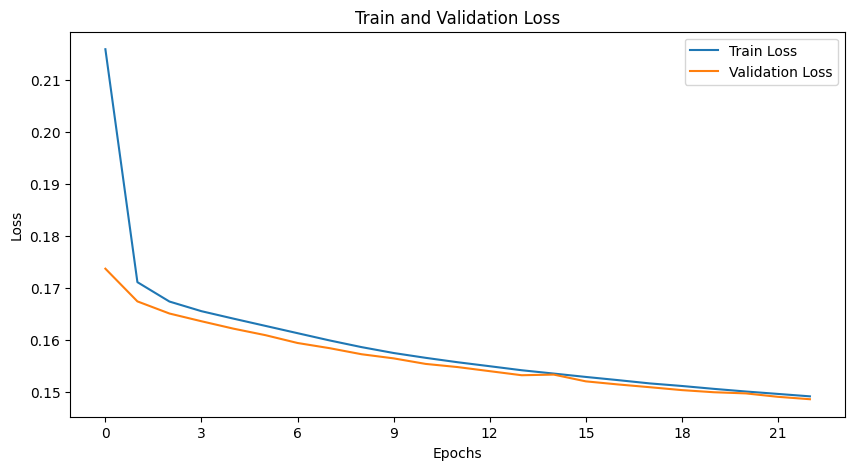

Epoch: 24, Train loss: 0.149, Val loss: 0.148, Epoch time = 8.039s


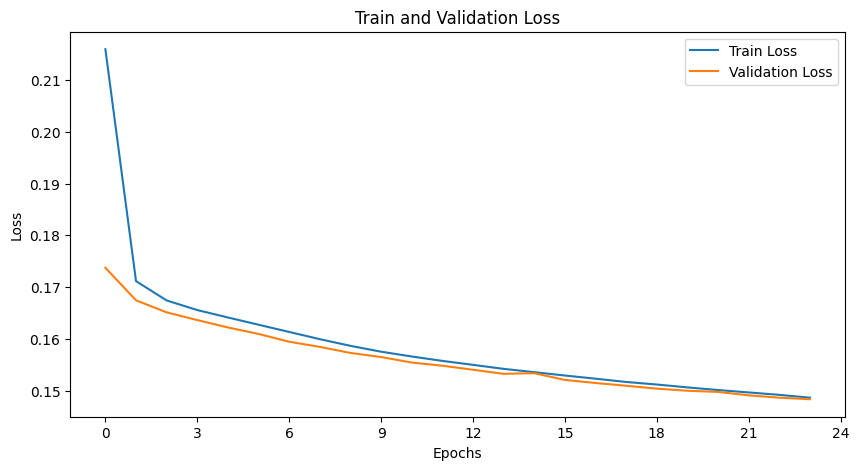

Epoch: 25, Train loss: 0.148, Val loss: 0.148, Epoch time = 8.034s


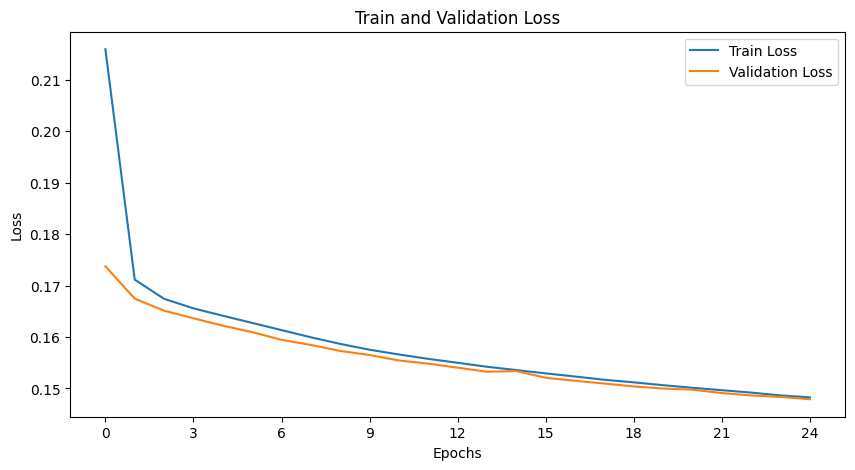

Epoch: 26, Train loss: 0.148, Val loss: 0.147, Epoch time = 8.044s


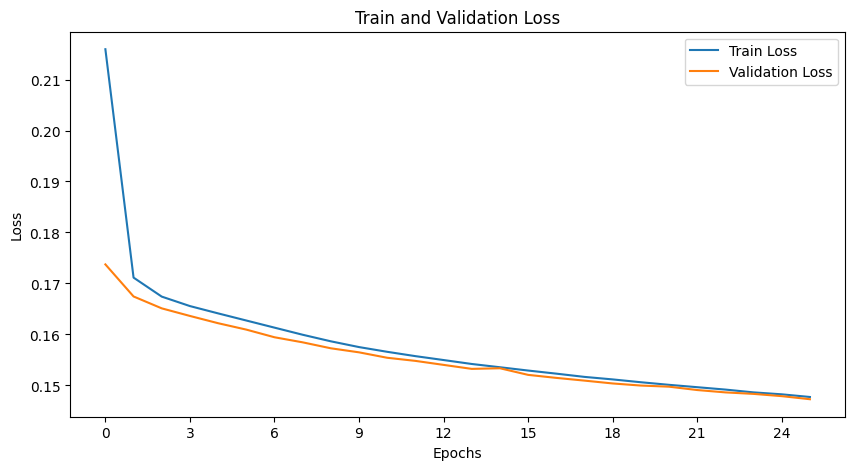

Epoch: 27, Train loss: 0.147, Val loss: 0.147, Epoch time = 8.018s


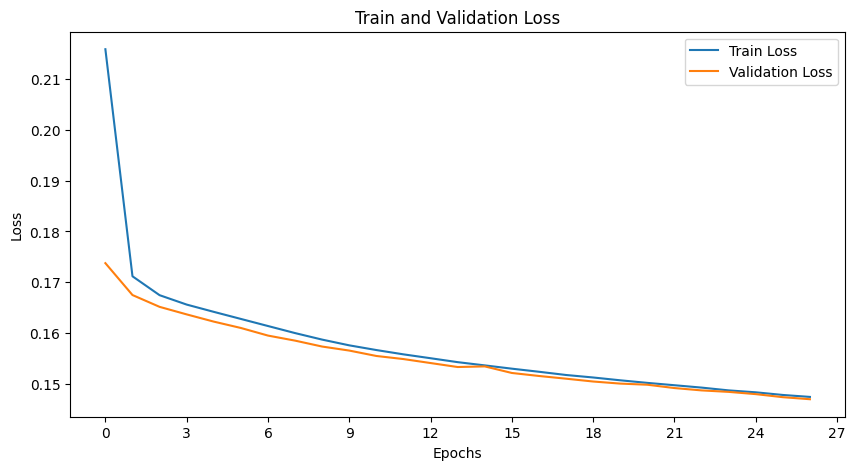

Epoch: 28, Train loss: 0.147, Val loss: 0.146, Epoch time = 8.026s


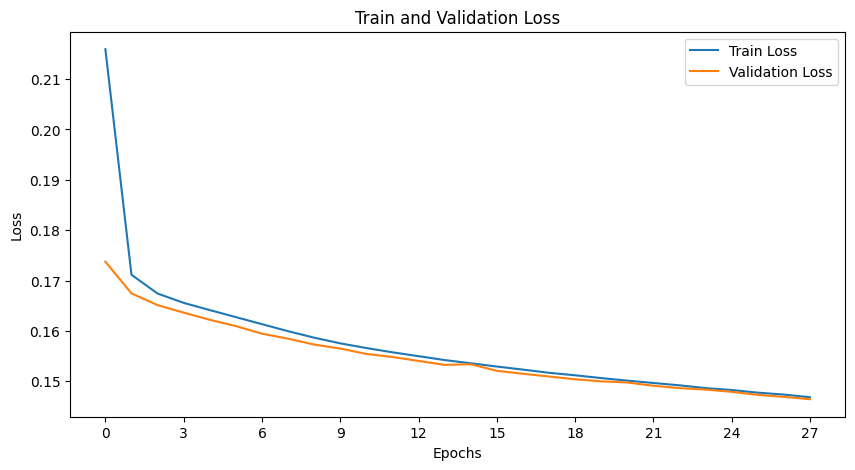

Epoch: 29, Train loss: 0.146, Val loss: 0.146, Epoch time = 8.029s


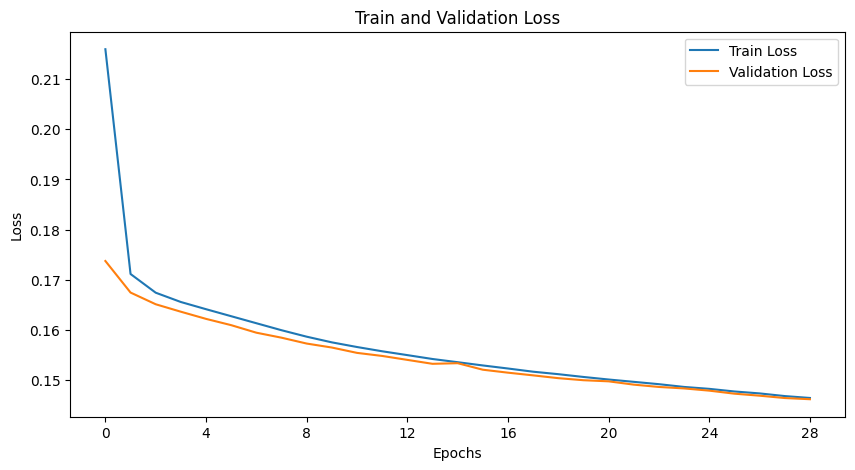

Epoch: 30, Train loss: 0.146, Val loss: 0.146, Epoch time = 8.021s


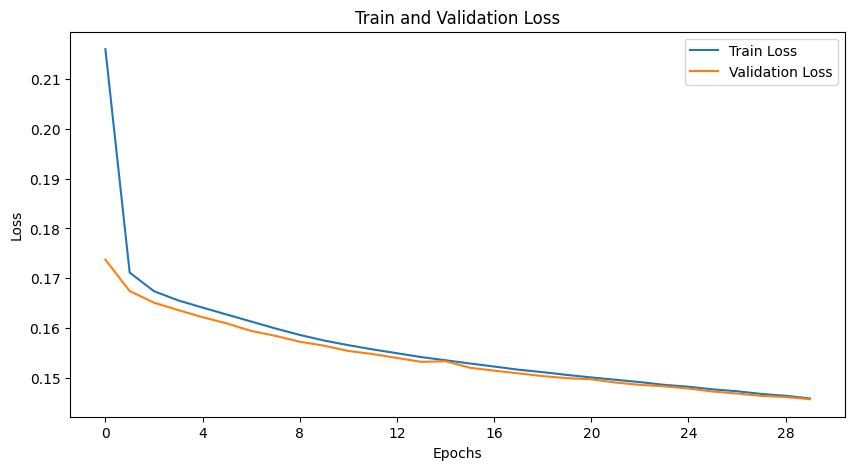

Epoch: 31, Train loss: 0.146, Val loss: 0.145, Epoch time = 8.012s


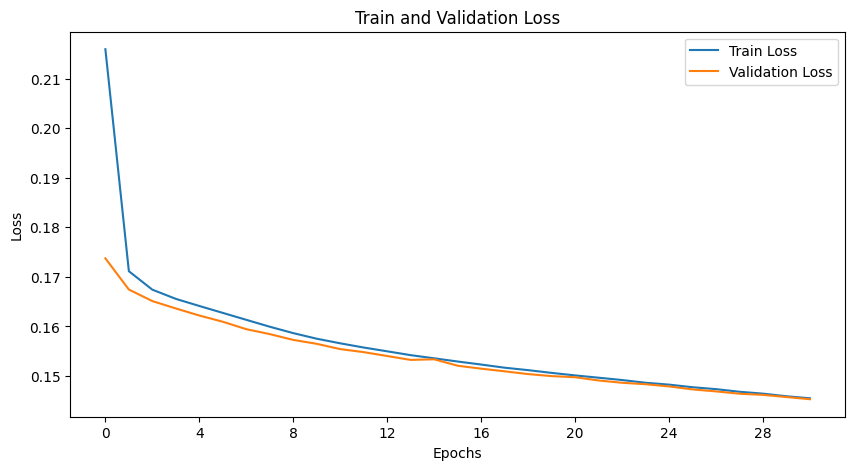

Epoch: 32, Train loss: 0.145, Val loss: 0.145, Epoch time = 8.023s


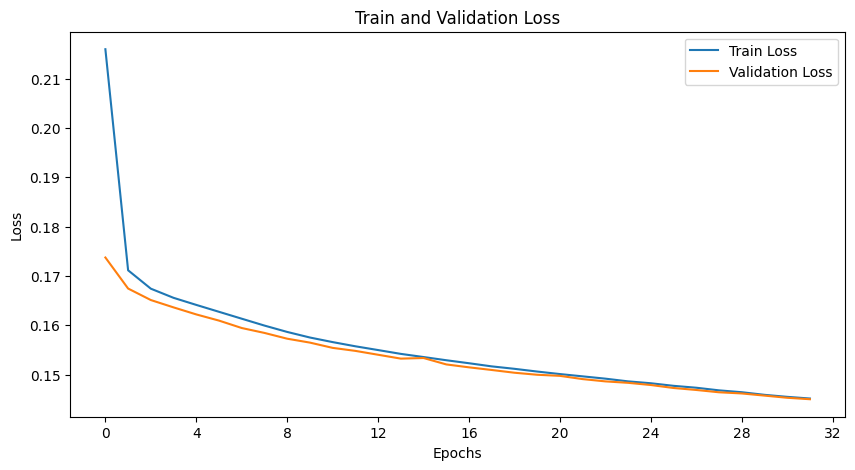

Epoch: 33, Train loss: 0.145, Val loss: 0.145, Epoch time = 8.056s


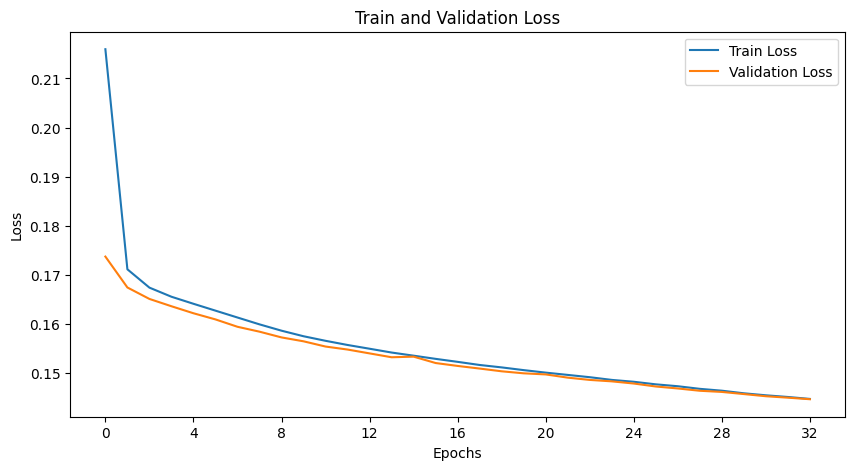

Epoch: 34, Train loss: 0.144, Val loss: 0.144, Epoch time = 8.051s


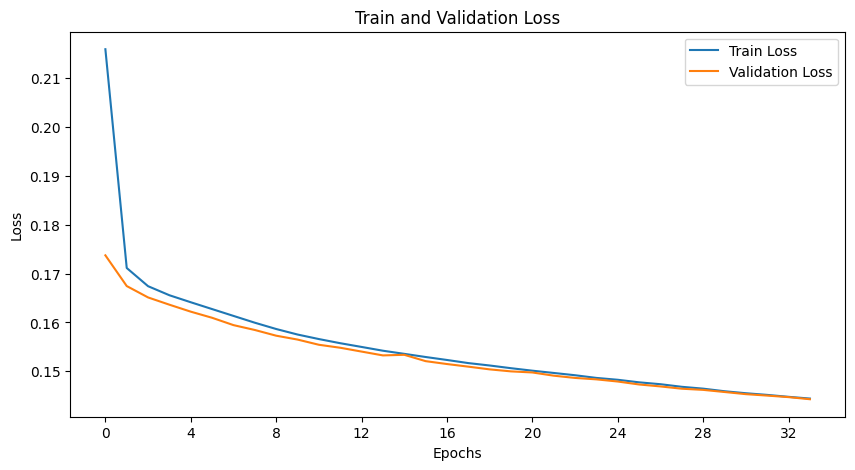

Epoch: 35, Train loss: 0.144, Val loss: 0.144, Epoch time = 8.035s


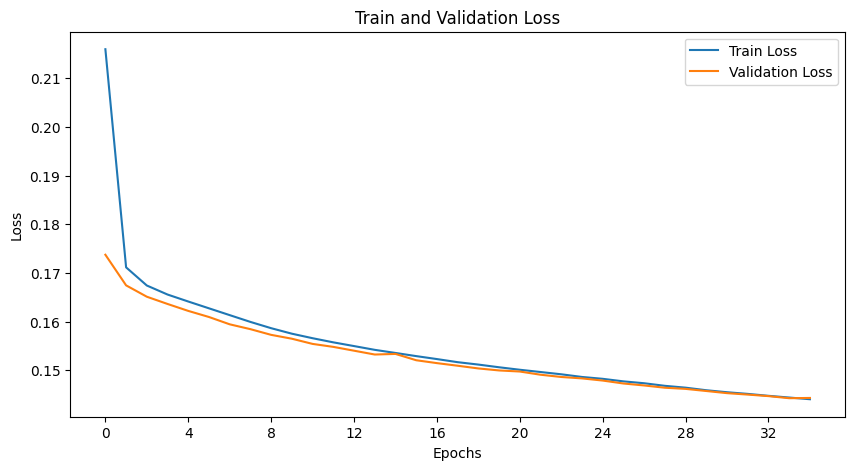

Epoch: 36, Train loss: 0.144, Val loss: 0.144, Epoch time = 8.047s


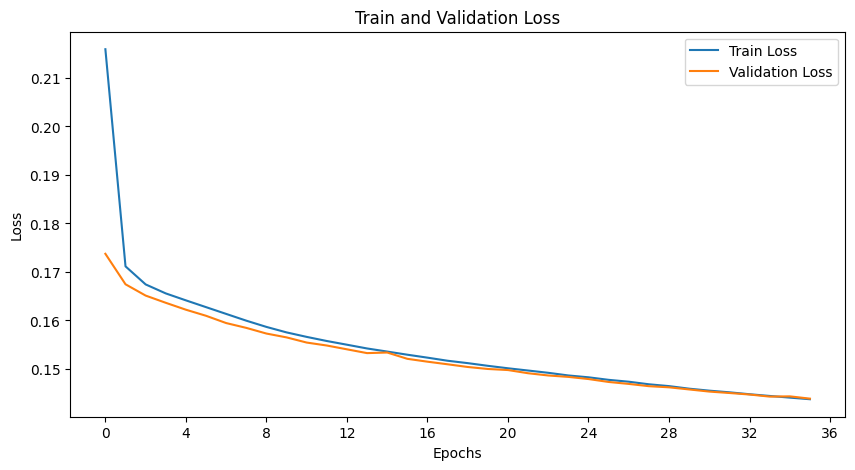

Epoch: 37, Train loss: 0.143, Val loss: 0.144, Epoch time = 8.053s


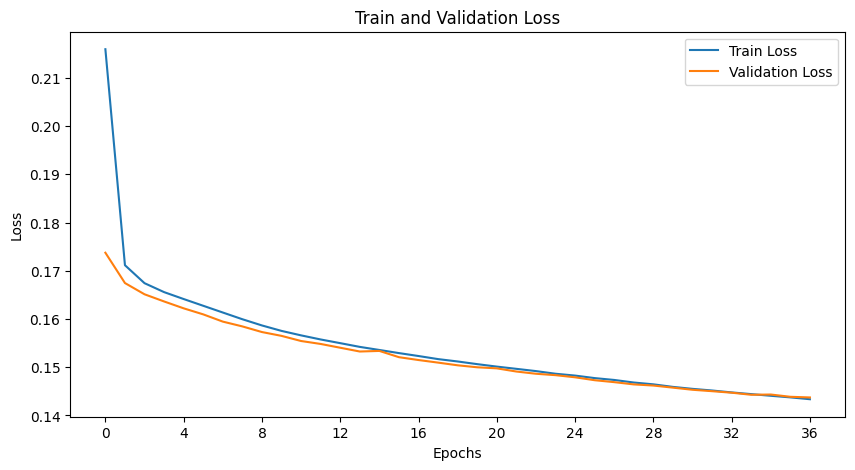

Epoch: 38, Train loss: 0.143, Val loss: 0.143, Epoch time = 8.010s


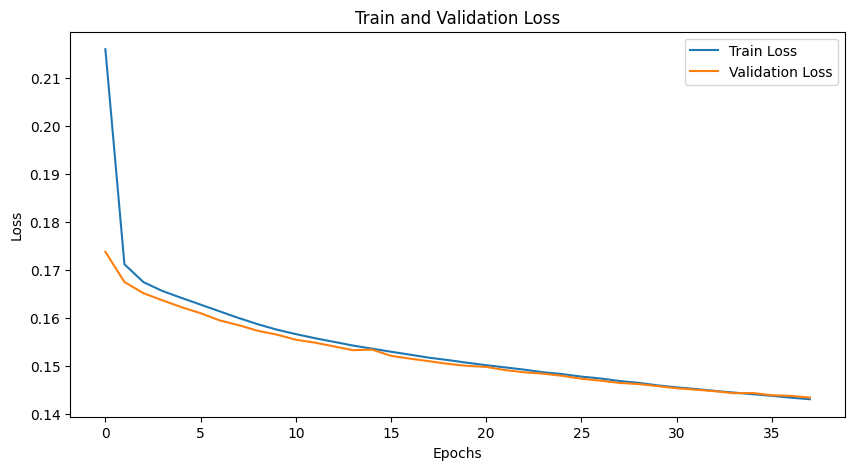

Epoch: 39, Train loss: 0.143, Val loss: 0.143, Epoch time = 8.037s


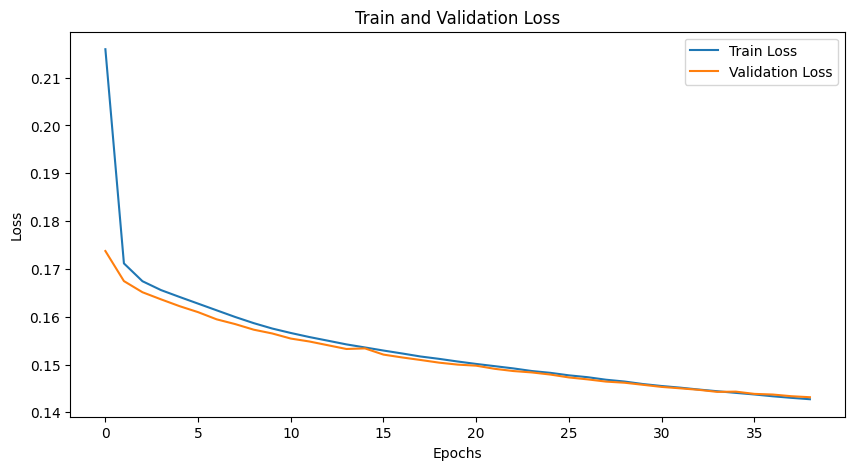

Epoch: 40, Train loss: 0.142, Val loss: 0.143, Epoch time = 8.029s


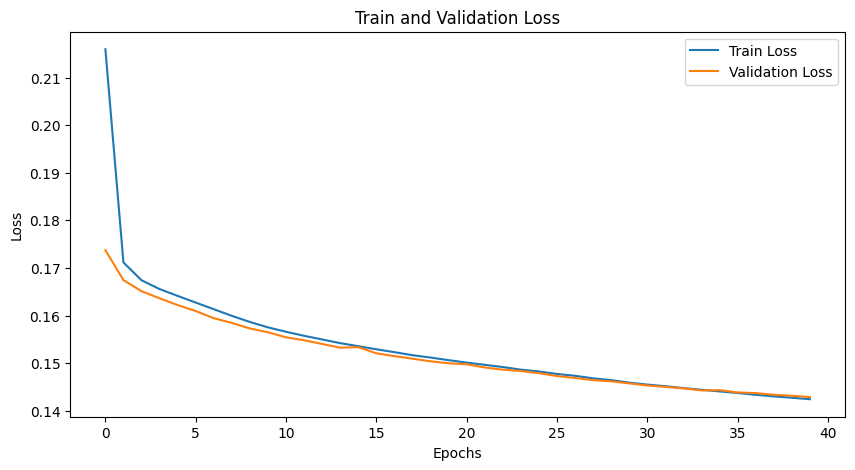

Epoch: 41, Train loss: 0.142, Val loss: 0.143, Epoch time = 8.022s


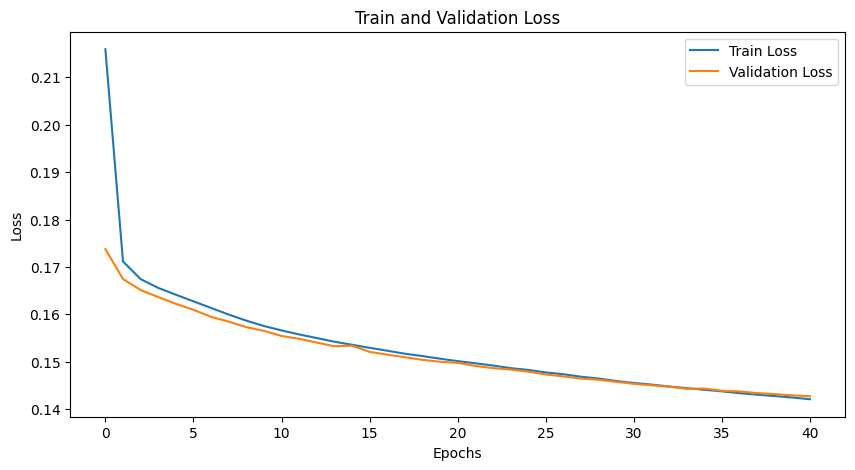

Epoch: 42, Train loss: 0.142, Val loss: 0.143, Epoch time = 8.205s


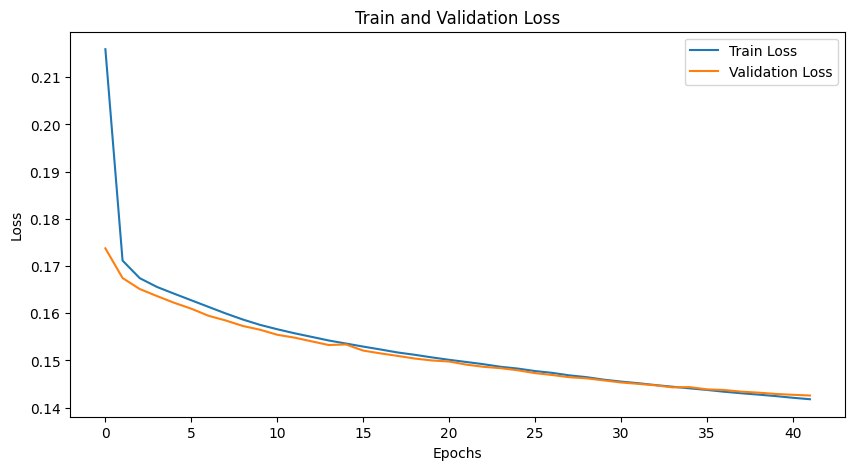

Epoch: 43, Train loss: 0.142, Val loss: 0.142, Epoch time = 8.091s


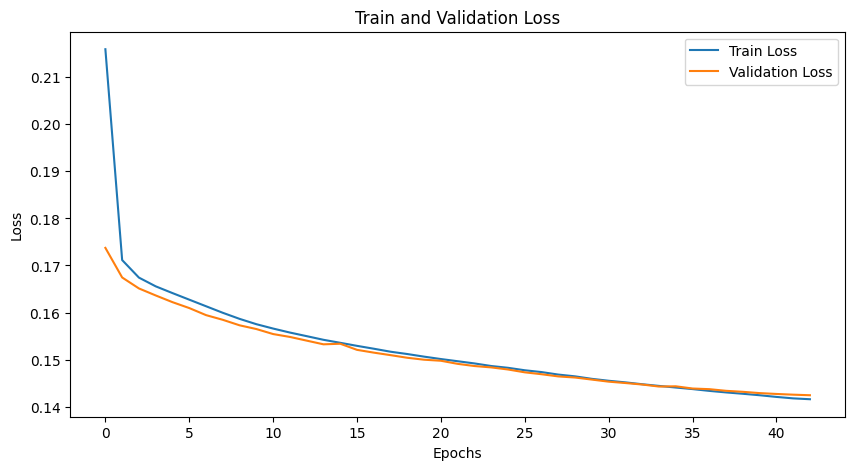

Epoch: 44, Train loss: 0.141, Val loss: 0.142, Epoch time = 7.729s


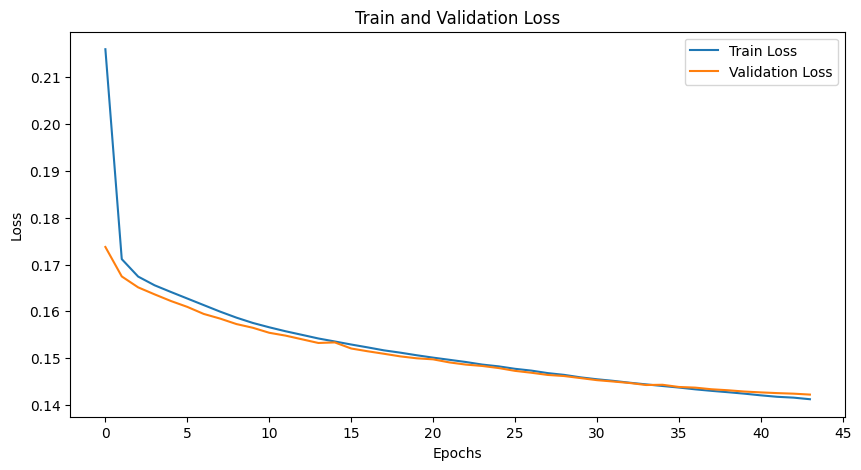

Epoch: 45, Train loss: 0.141, Val loss: 0.142, Epoch time = 7.589s


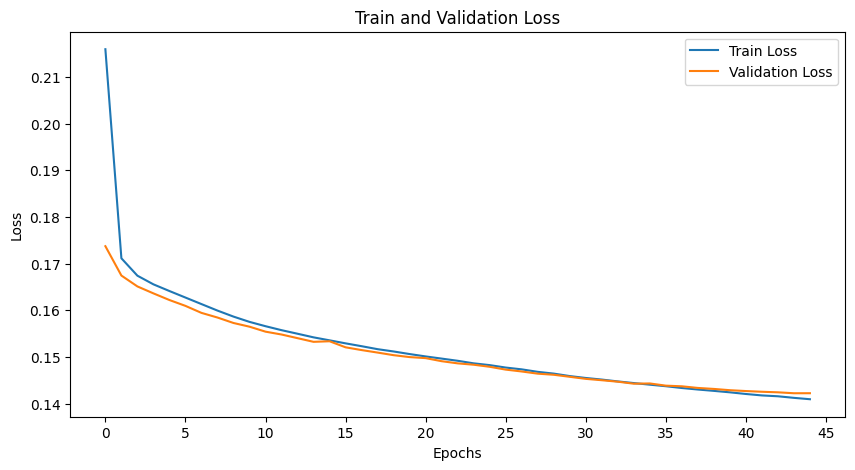

Epoch: 46, Train loss: 0.141, Val loss: 0.142, Epoch time = 7.564s


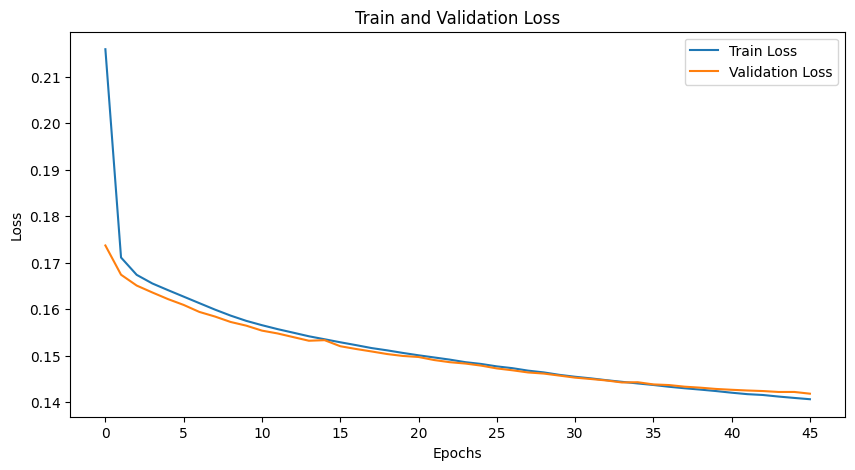

Epoch: 47, Train loss: 0.140, Val loss: 0.142, Epoch time = 7.586s


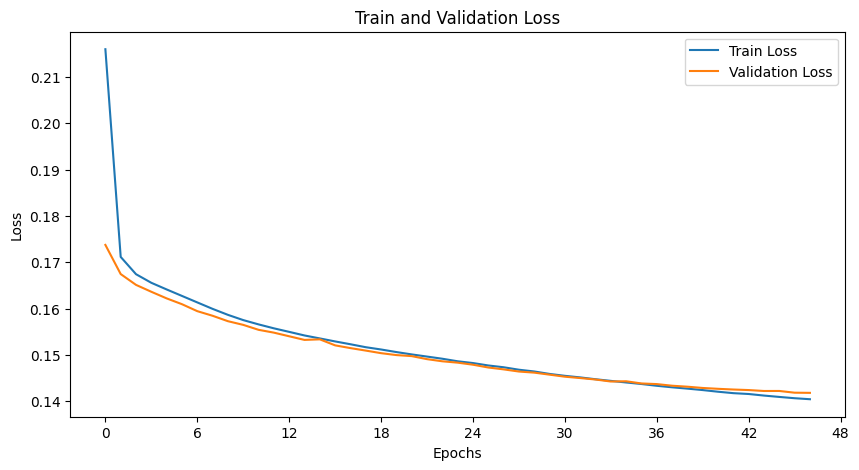

Epoch: 48, Train loss: 0.140, Val loss: 0.142, Epoch time = 7.597s


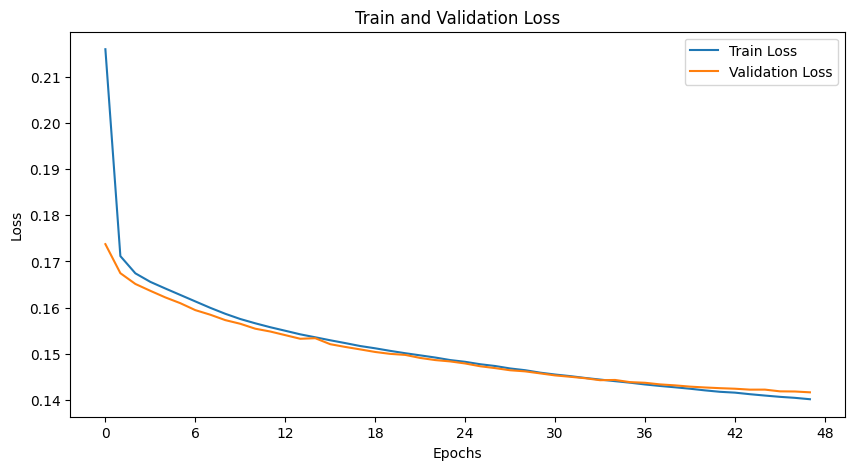

Epoch: 49, Train loss: 0.140, Val loss: 0.142, Epoch time = 7.592s


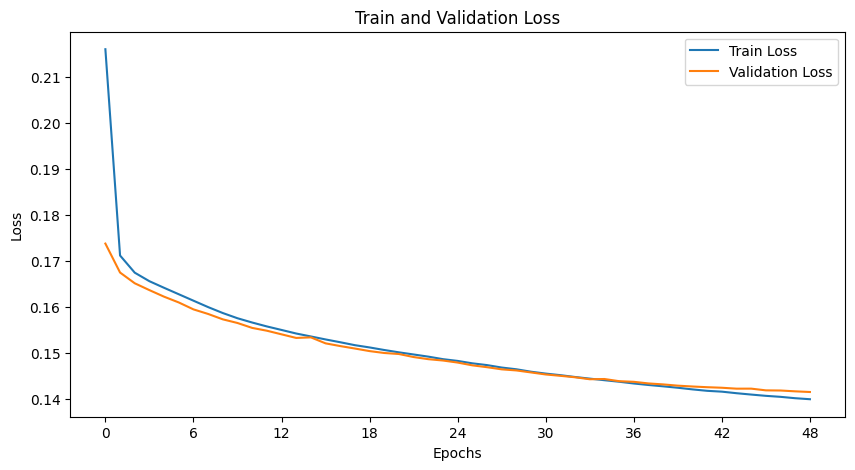

Epoch: 50, Train loss: 0.140, Val loss: 0.141, Epoch time = 7.595s


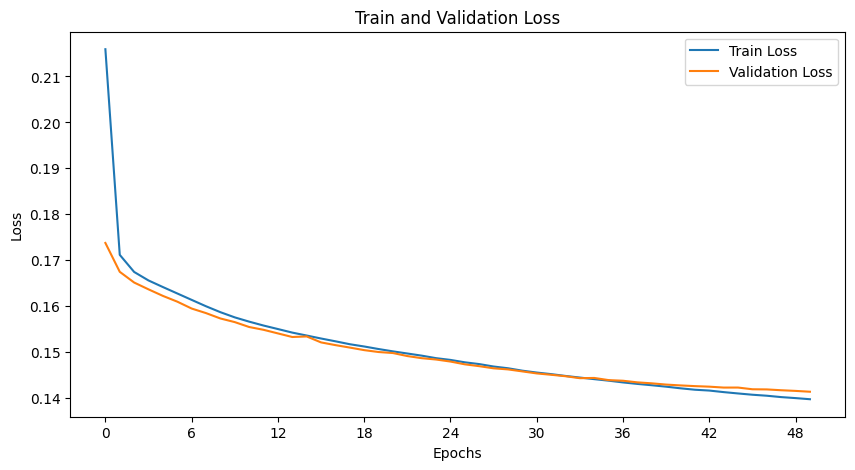

Epoch: 51, Train loss: 0.139, Val loss: 0.141, Epoch time = 7.583s


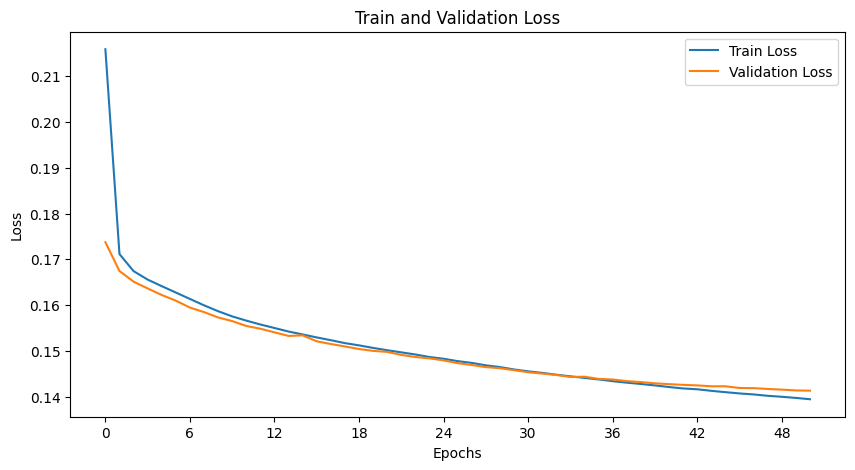

Epoch: 52, Train loss: 0.139, Val loss: 0.141, Epoch time = 7.585s


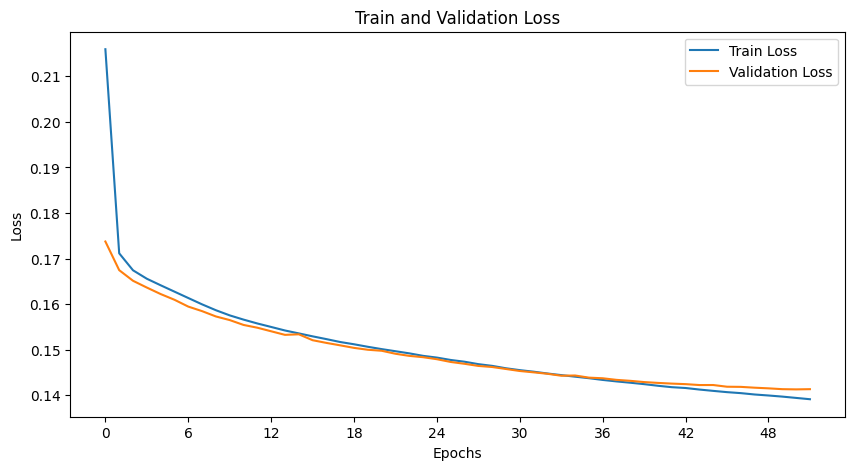

Epoch: 53, Train loss: 0.139, Val loss: 0.141, Epoch time = 7.593s


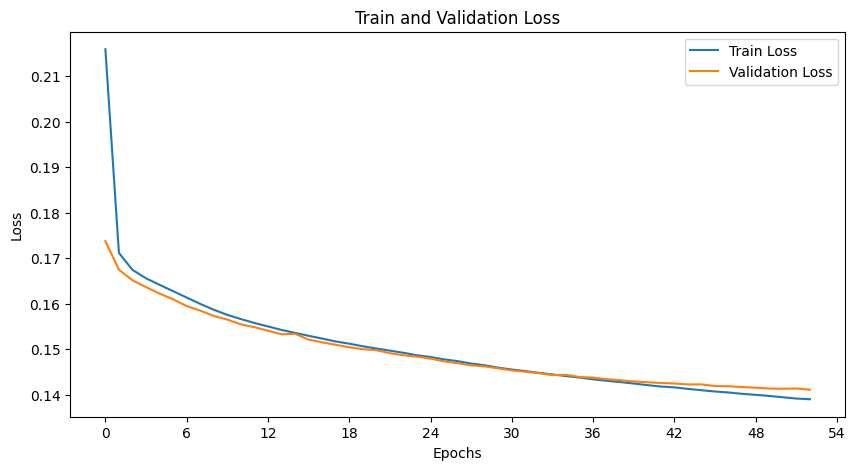

Epoch: 54, Train loss: 0.139, Val loss: 0.141, Epoch time = 7.584s


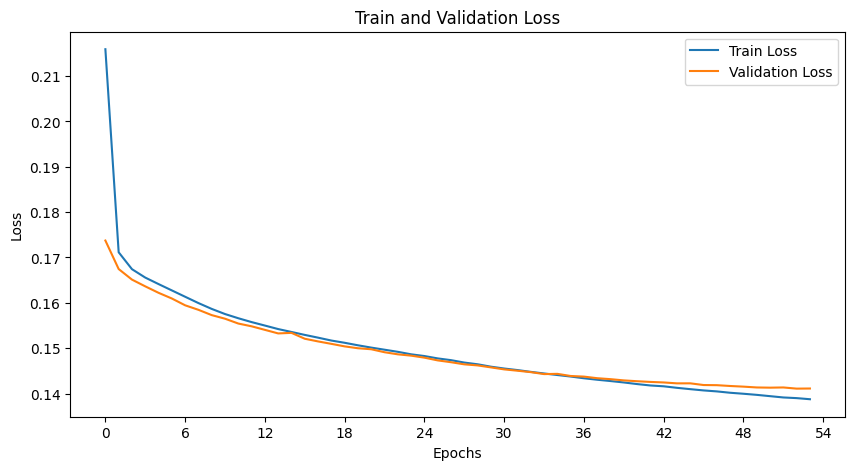

Epoch: 55, Train loss: 0.139, Val loss: 0.141, Epoch time = 7.693s


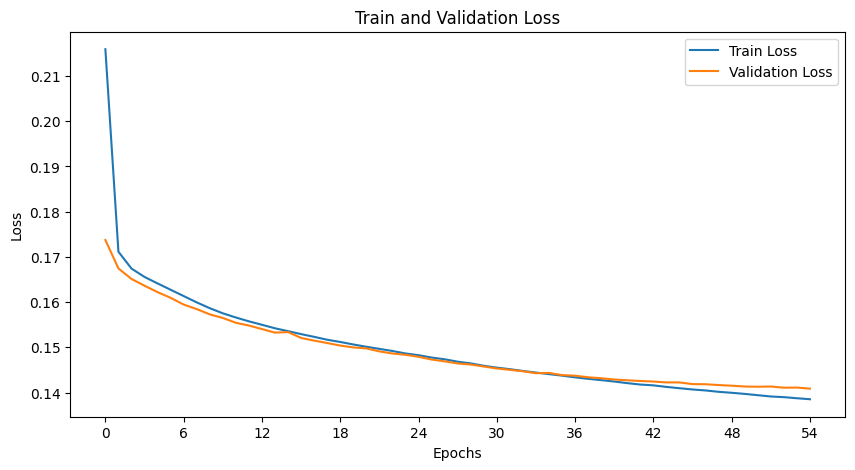

Epoch: 56, Train loss: 0.138, Val loss: 0.141, Epoch time = 8.046s


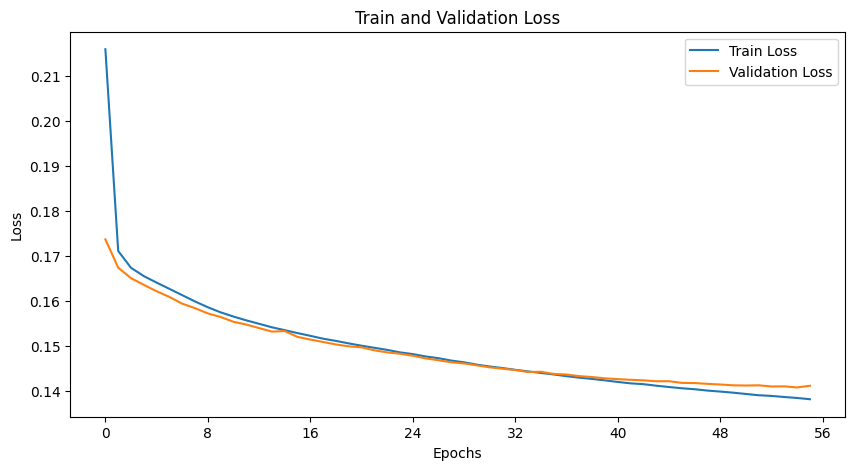

Epoch: 57, Train loss: 0.138, Val loss: 0.141, Epoch time = 7.689s


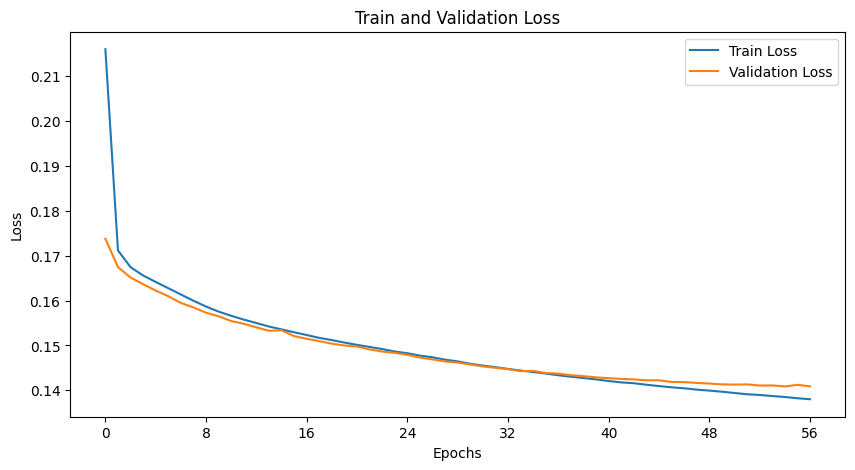

Epoch: 58, Train loss: 0.138, Val loss: 0.141, Epoch time = 7.644s


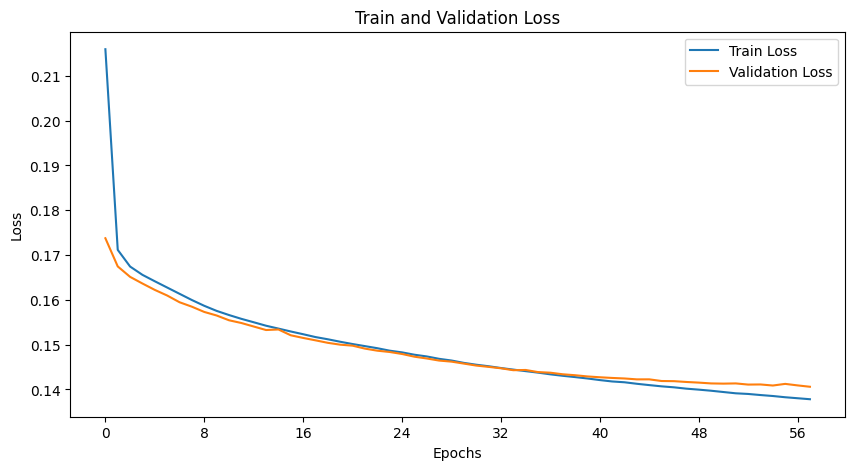

Epoch: 59, Train loss: 0.138, Val loss: 0.141, Epoch time = 7.594s


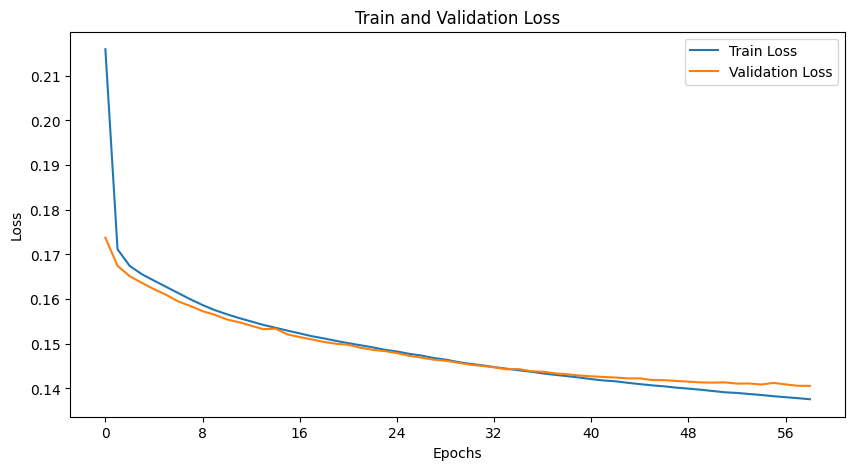

Epoch: 60, Train loss: 0.137, Val loss: 0.141, Epoch time = 7.875s


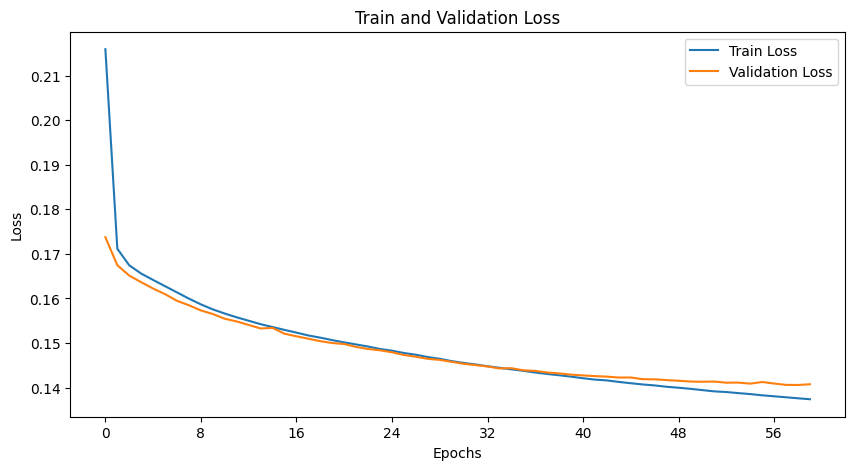

Epoch: 61, Train loss: 0.137, Val loss: 0.141, Epoch time = 7.717s


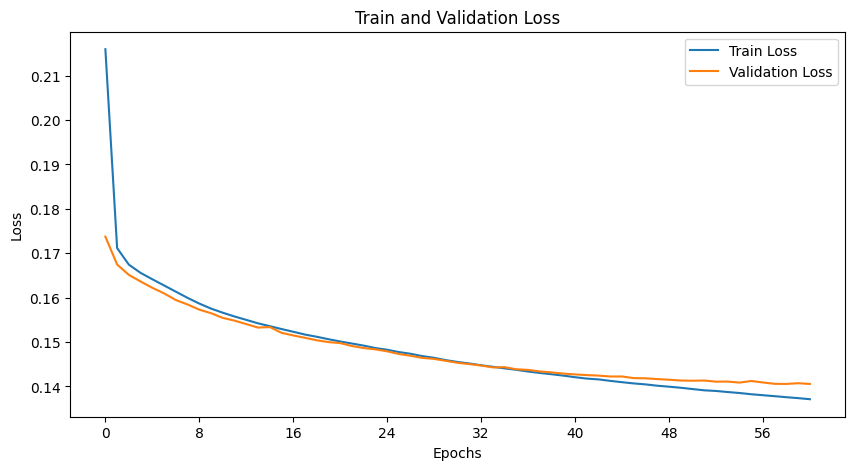

Epoch: 62, Train loss: 0.137, Val loss: 0.141, Epoch time = 7.658s


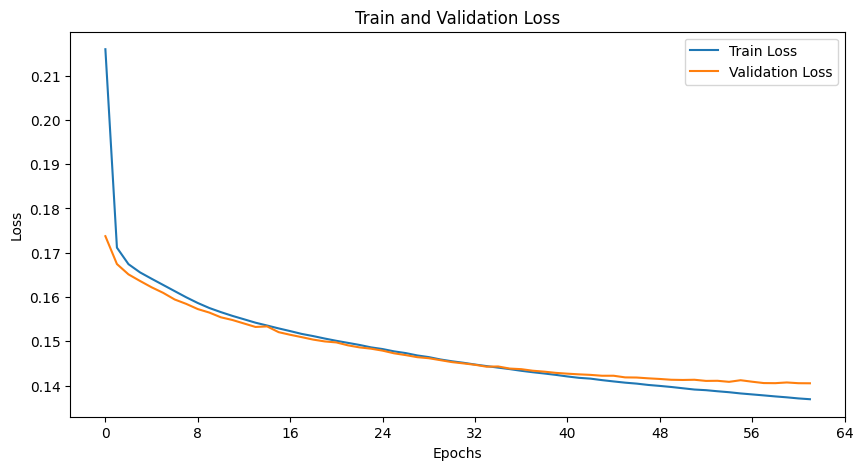

Epoch: 63, Train loss: 0.137, Val loss: 0.140, Epoch time = 7.600s


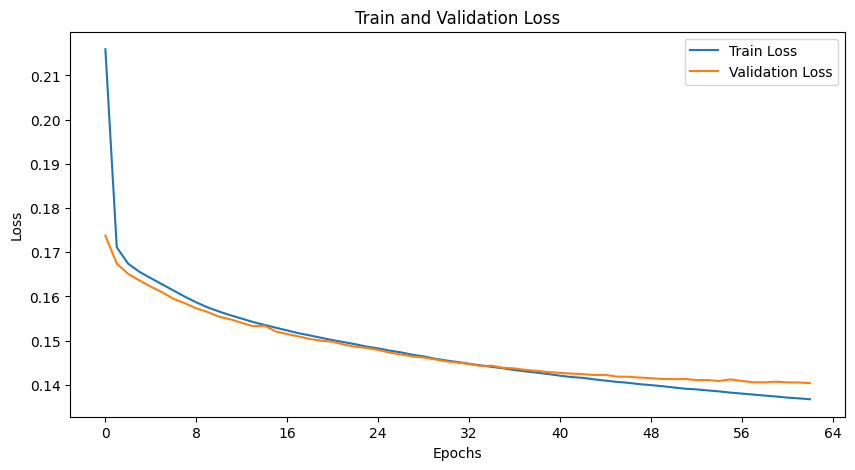

Epoch: 64, Train loss: 0.136, Val loss: 0.141, Epoch time = 7.781s


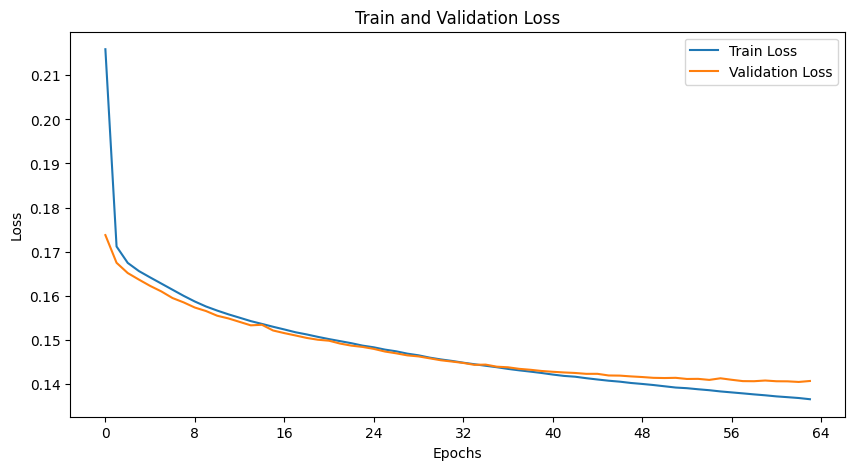

Epoch: 65, Train loss: 0.136, Val loss: 0.140, Epoch time = 7.885s


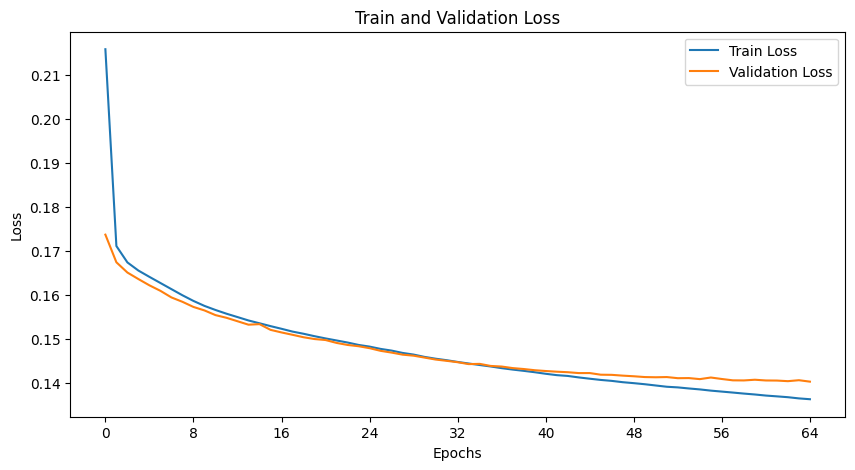

Epoch: 66, Train loss: 0.136, Val loss: 0.140, Epoch time = 7.698s


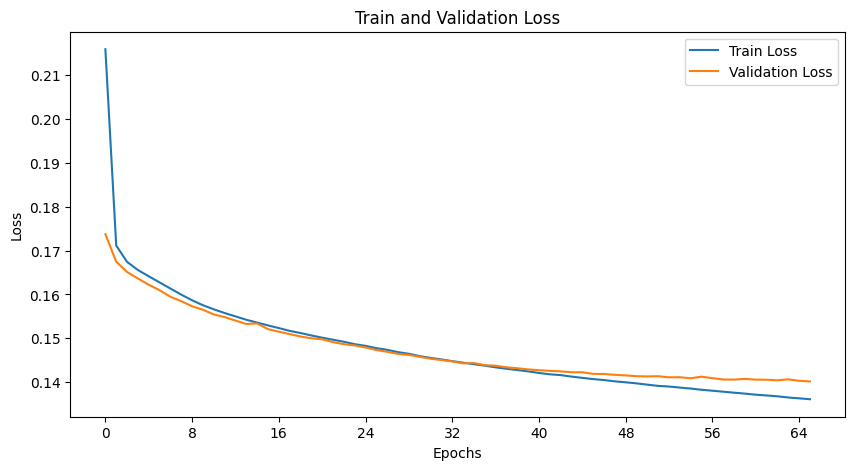

Epoch: 67, Train loss: 0.136, Val loss: 0.140, Epoch time = 7.714s


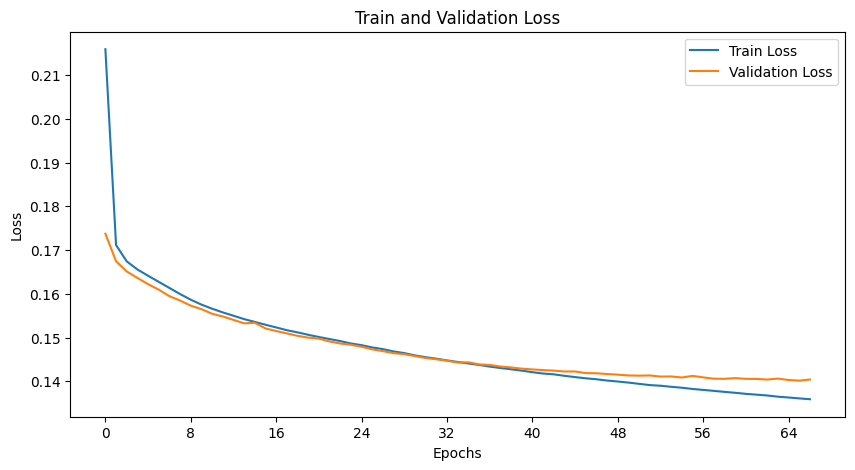

Epoch: 68, Train loss: 0.136, Val loss: 0.140, Epoch time = 7.759s


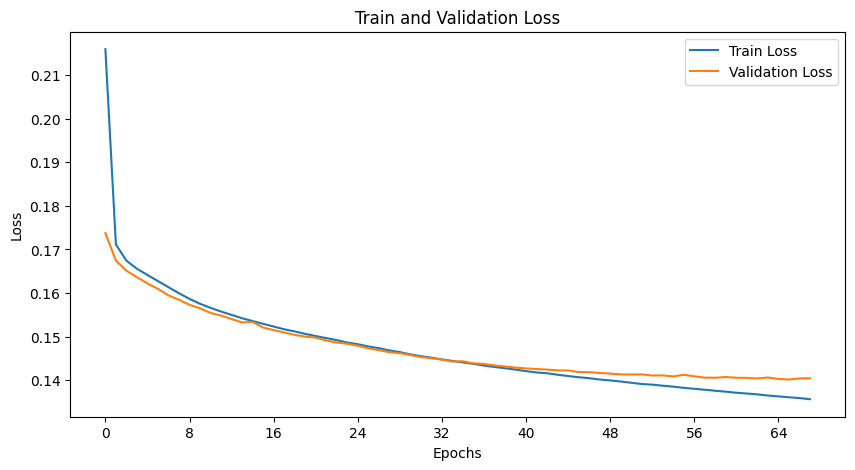

Epoch: 69, Train loss: 0.135, Val loss: 0.140, Epoch time = 7.795s


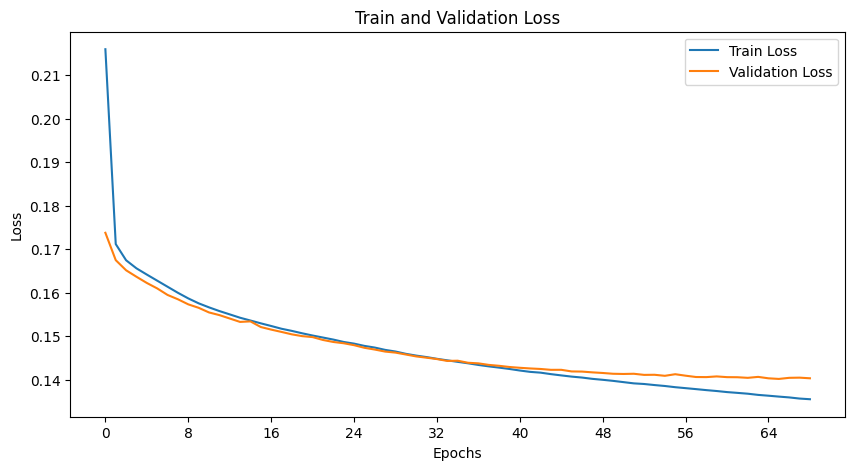

Epoch: 70, Train loss: 0.135, Val loss: 0.140, Epoch time = 7.678s


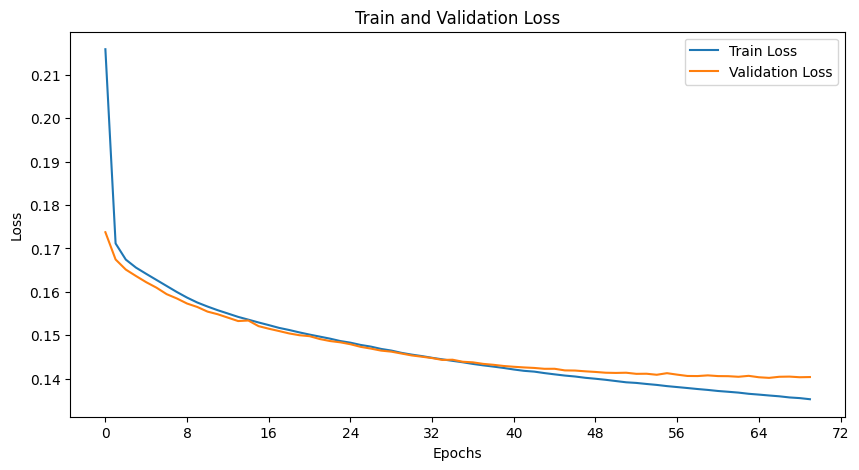

Epoch: 71, Train loss: 0.135, Val loss: 0.140, Epoch time = 7.750s


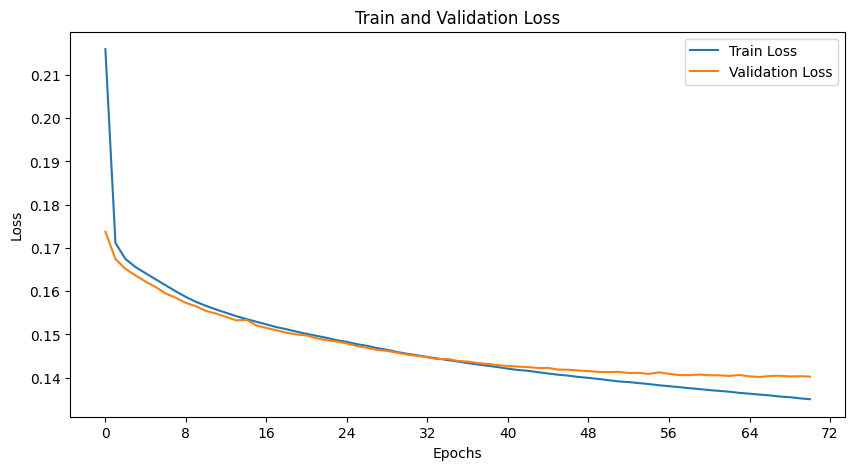

Epoch: 72, Train loss: 0.135, Val loss: 0.140, Epoch time = 7.754s


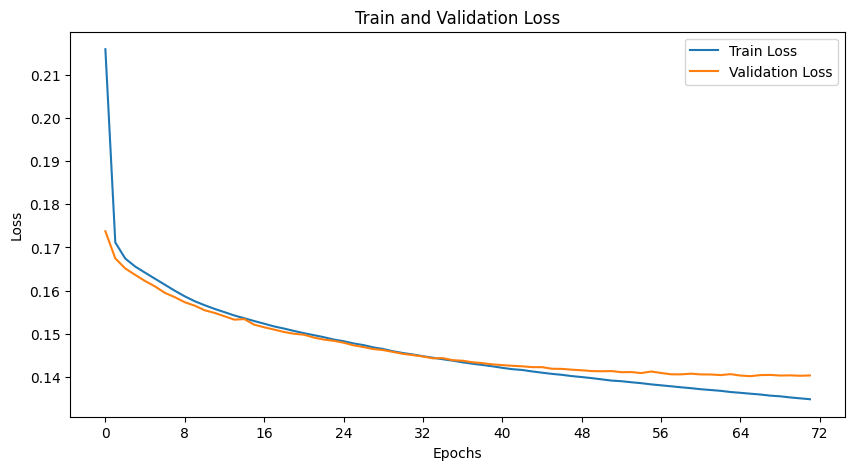

Epoch: 73, Train loss: 0.135, Val loss: 0.141, Epoch time = 7.739s


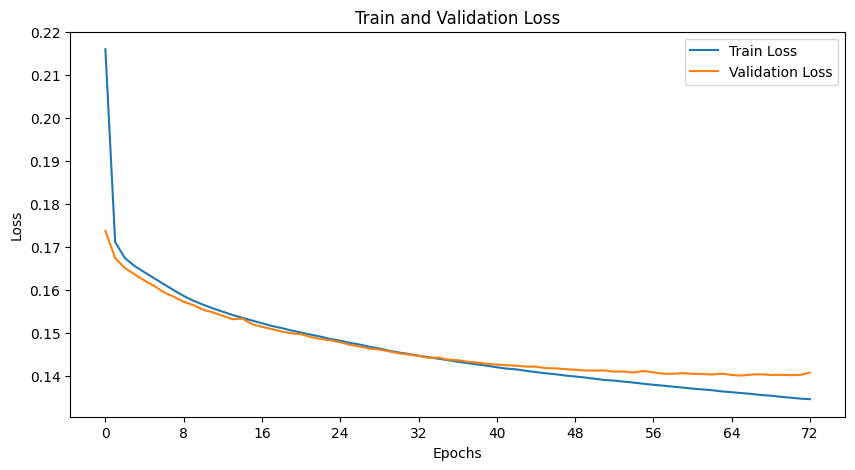

Epoch: 74, Train loss: 0.134, Val loss: 0.140, Epoch time = 7.695s


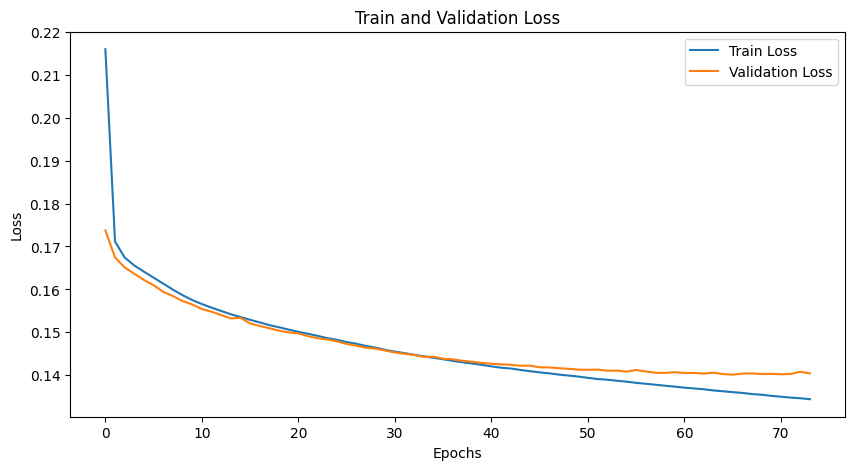

Epoch: 75, Train loss: 0.134, Val loss: 0.140, Epoch time = 7.697s


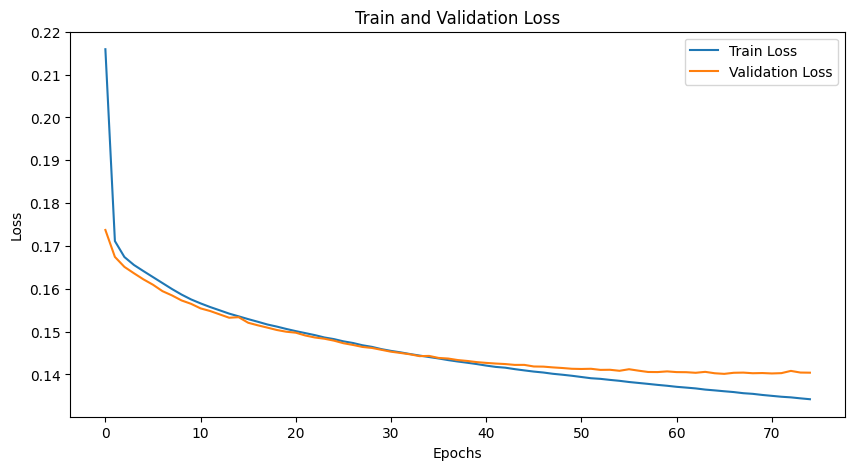

Epoch: 76, Train loss: 0.134, Val loss: 0.140, Epoch time = 7.798s


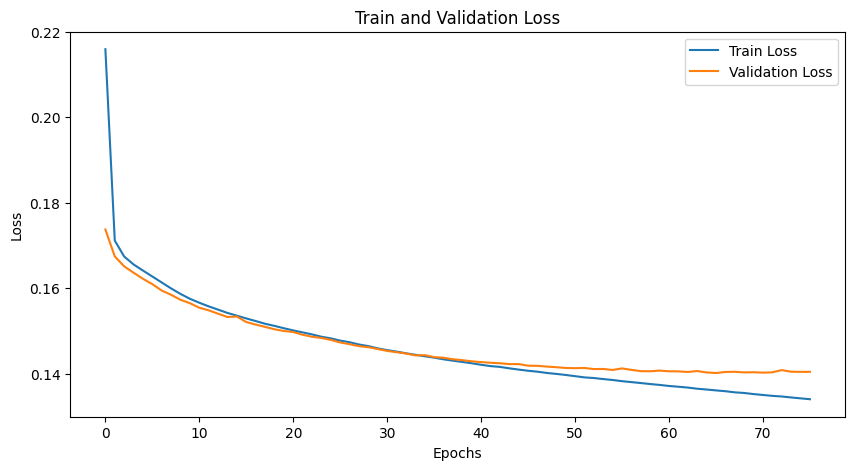

Epoch: 77, Train loss: 0.134, Val loss: 0.140, Epoch time = 7.747s


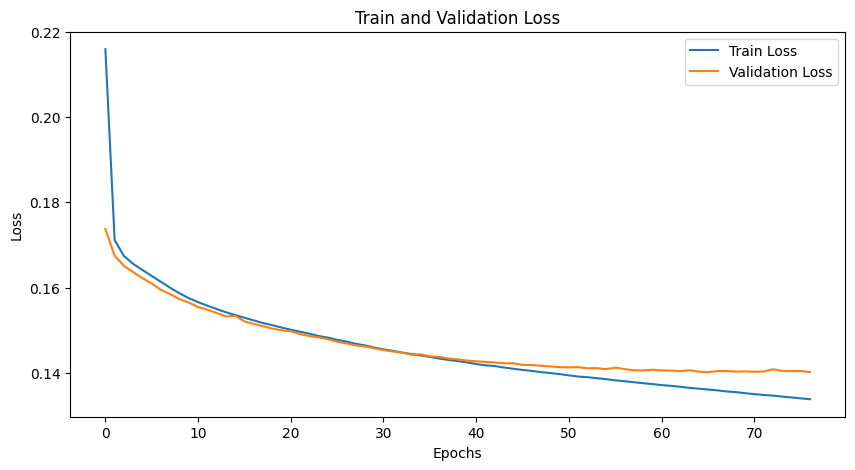

Epoch: 78, Train loss: 0.134, Val loss: 0.140, Epoch time = 7.591s


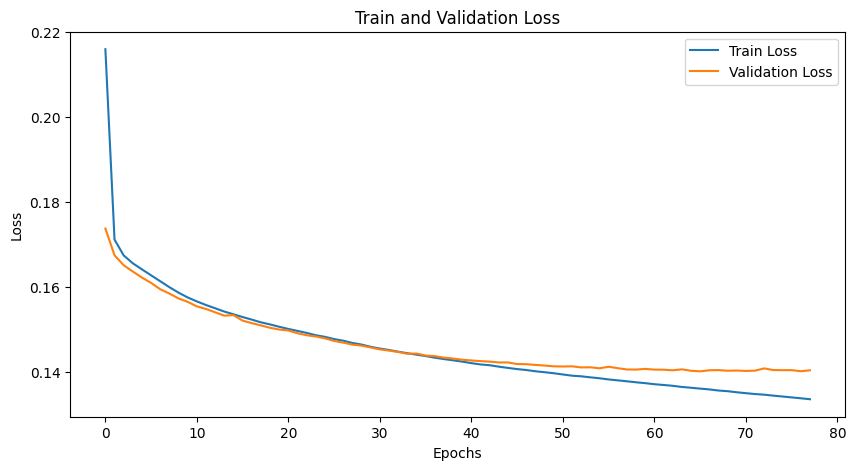

Epoch: 79, Train loss: 0.133, Val loss: 0.141, Epoch time = 7.770s


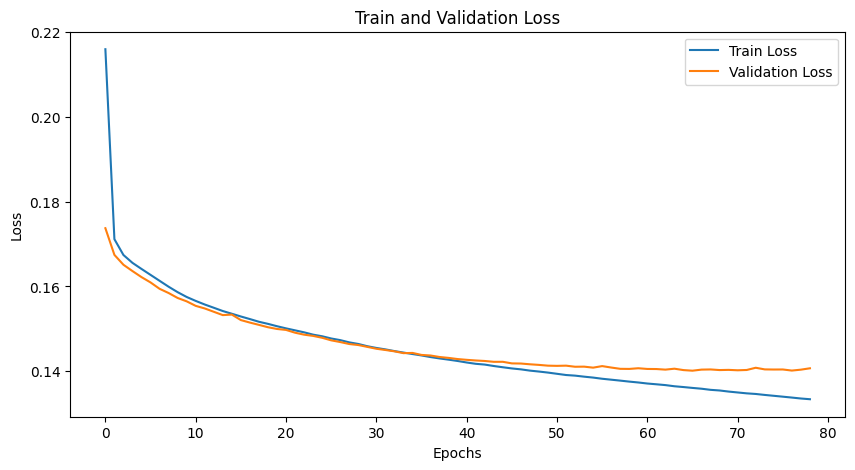

Epoch: 80, Train loss: 0.133, Val loss: 0.141, Epoch time = 7.670s


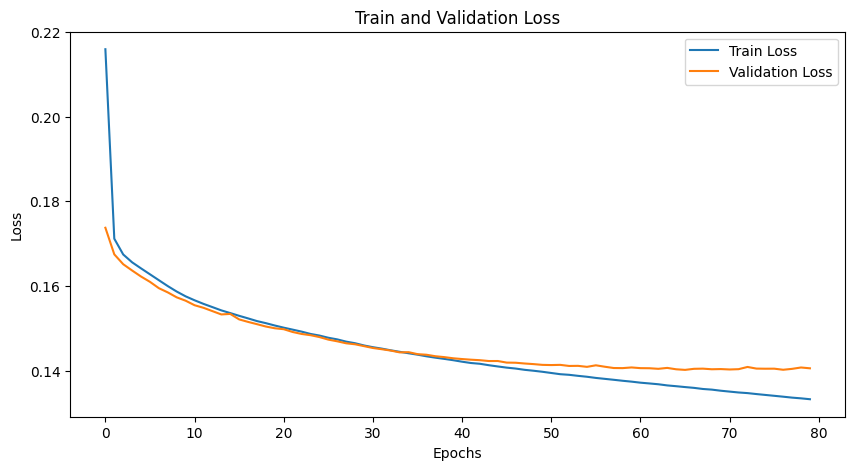

Epoch: 81, Train loss: 0.133, Val loss: 0.140, Epoch time = 7.745s


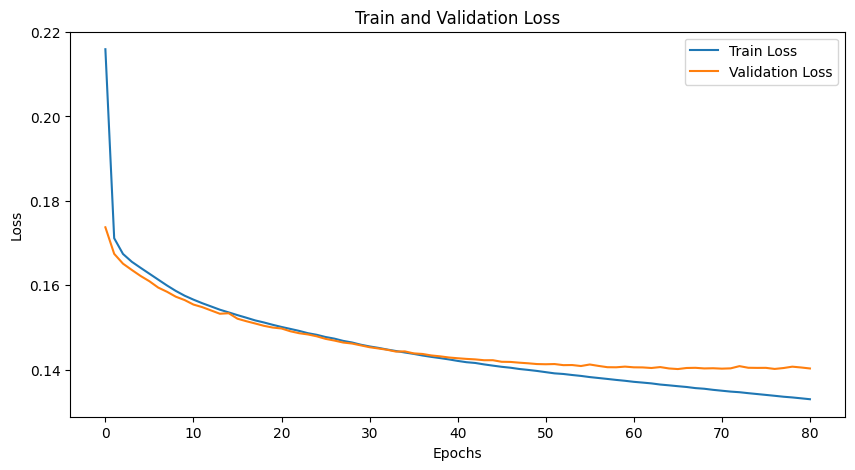

Epoch: 82, Train loss: 0.133, Val loss: 0.140, Epoch time = 7.748s


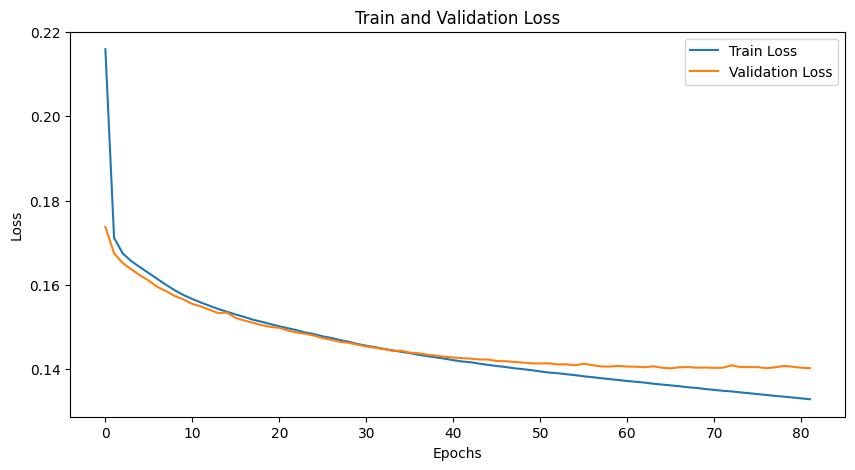

Epoch: 83, Train loss: 0.133, Val loss: 0.140, Epoch time = 7.681s


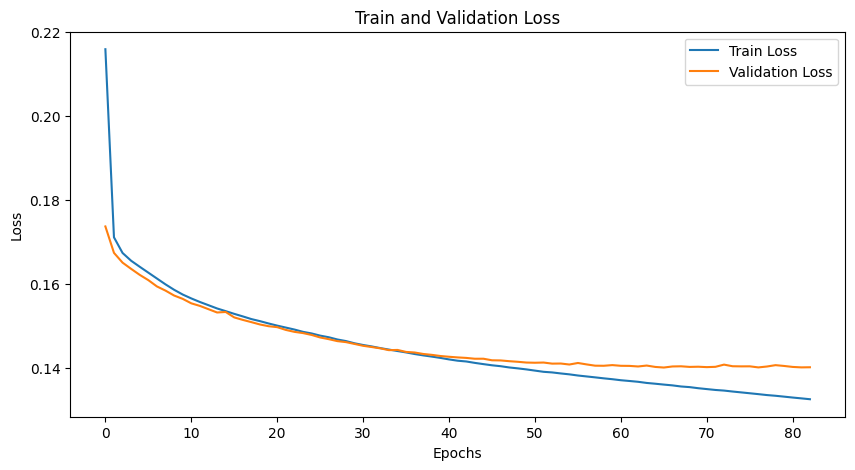

Epoch: 84, Train loss: 0.132, Val loss: 0.140, Epoch time = 7.577s


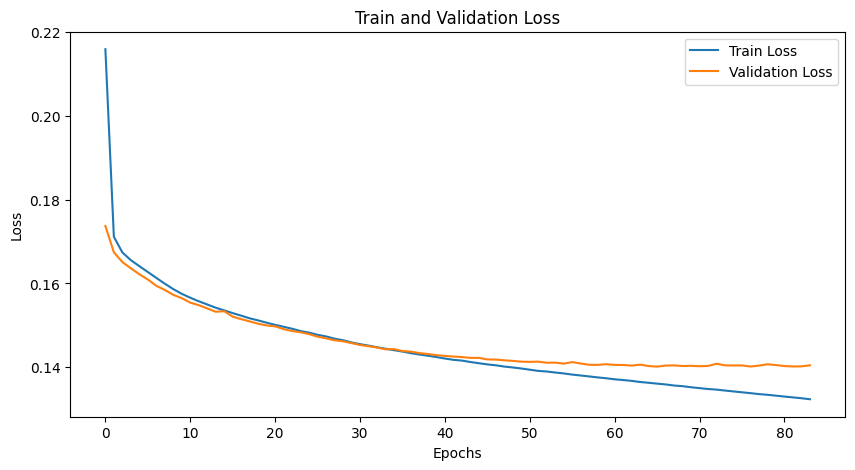

Epoch: 85, Train loss: 0.132, Val loss: 0.140, Epoch time = 7.784s


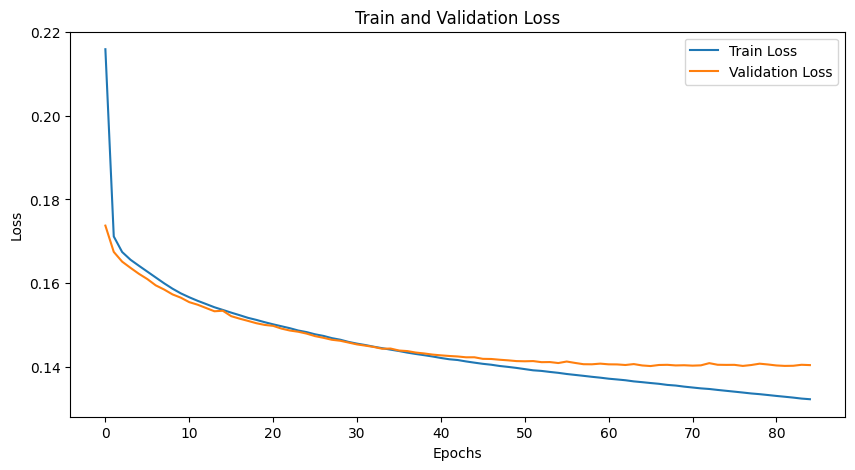

Epoch: 86, Train loss: 0.132, Val loss: 0.140, Epoch time = 7.575s


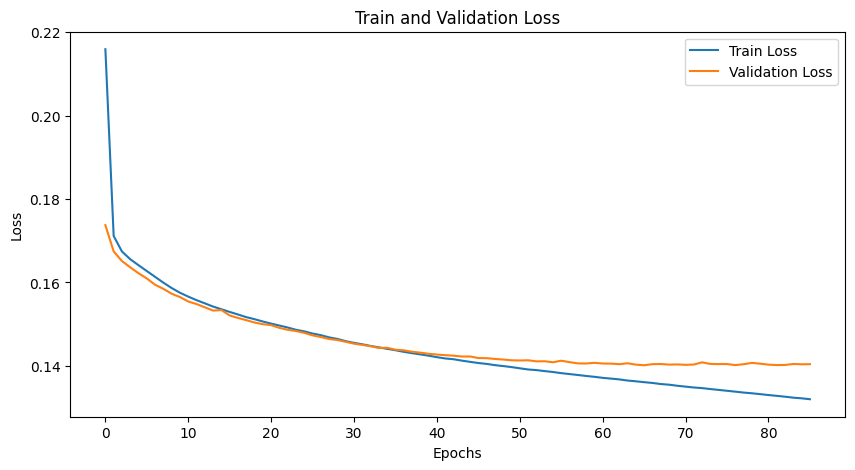

Epoch: 87, Train loss: 0.132, Val loss: 0.141, Epoch time = 7.753s


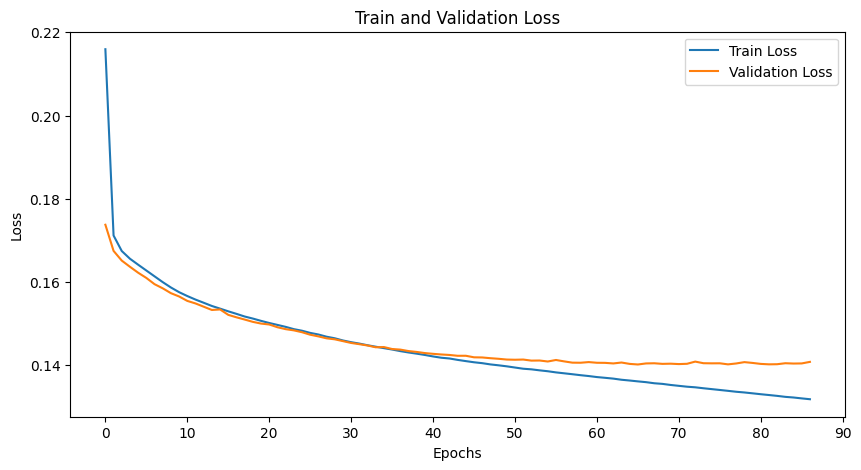

Epoch: 88, Train loss: 0.132, Val loss: 0.141, Epoch time = 7.570s


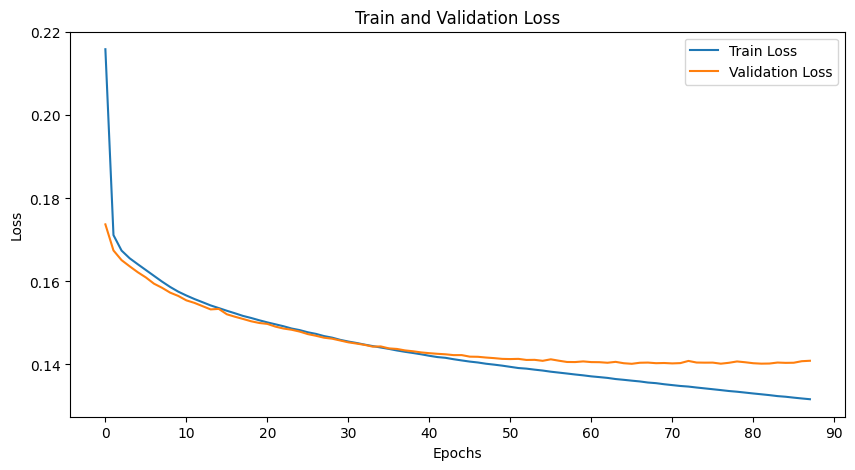

Epoch: 89, Train loss: 0.131, Val loss: 0.141, Epoch time = 7.572s


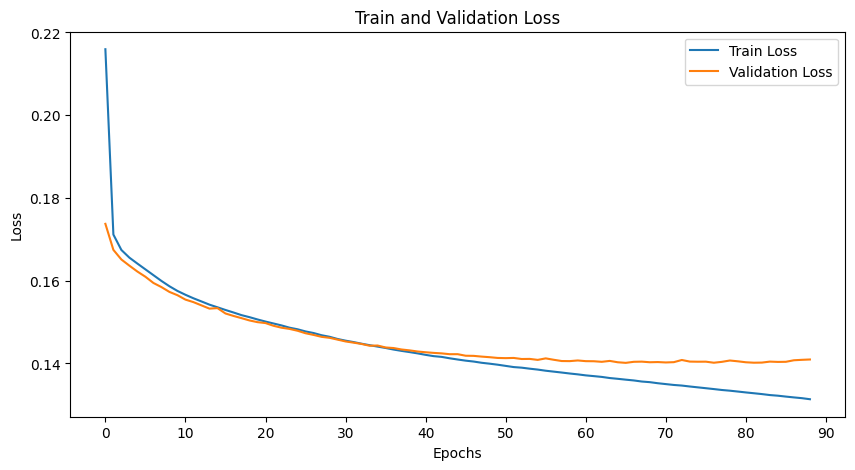

Epoch: 90, Train loss: 0.131, Val loss: 0.141, Epoch time = 7.582s


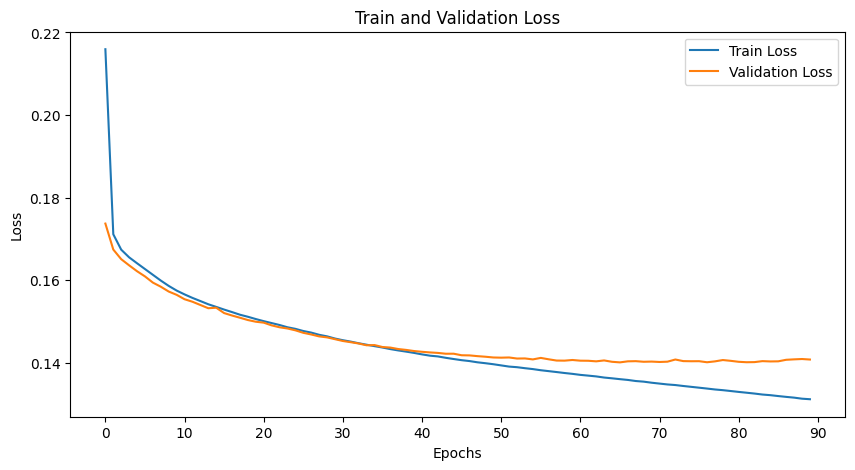

Epoch: 91, Train loss: 0.131, Val loss: 0.141, Epoch time = 7.584s


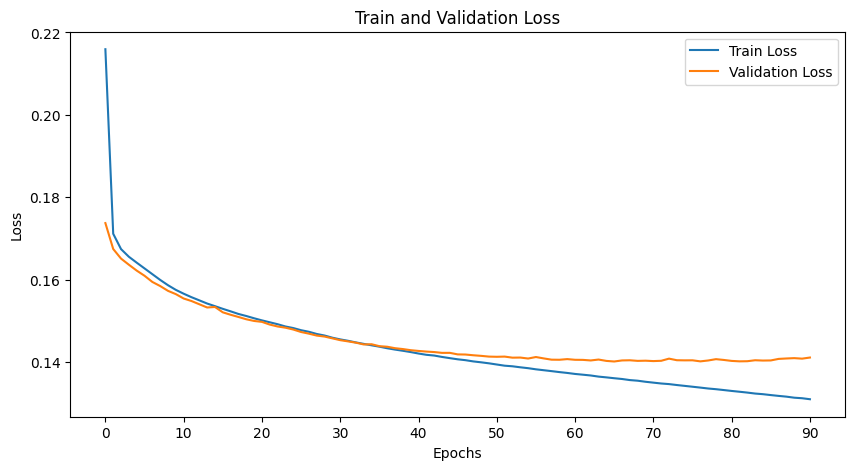

Epoch: 92, Train loss: 0.131, Val loss: 0.141, Epoch time = 7.575s


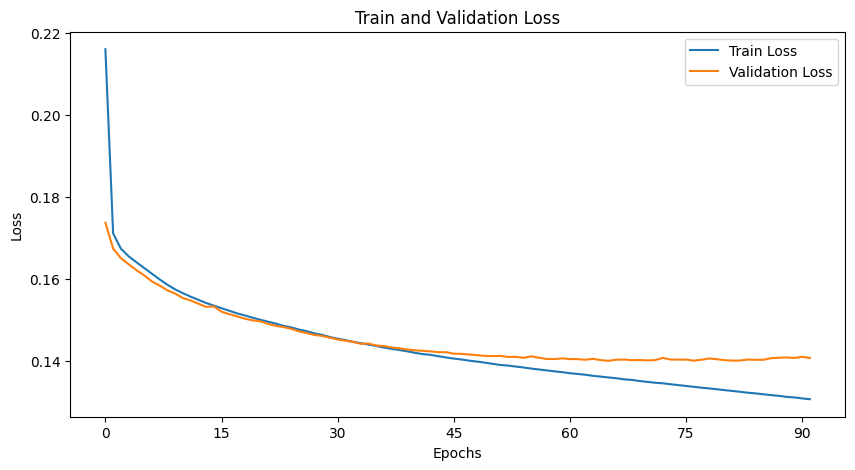

Epoch: 93, Train loss: 0.131, Val loss: 0.141, Epoch time = 7.580s


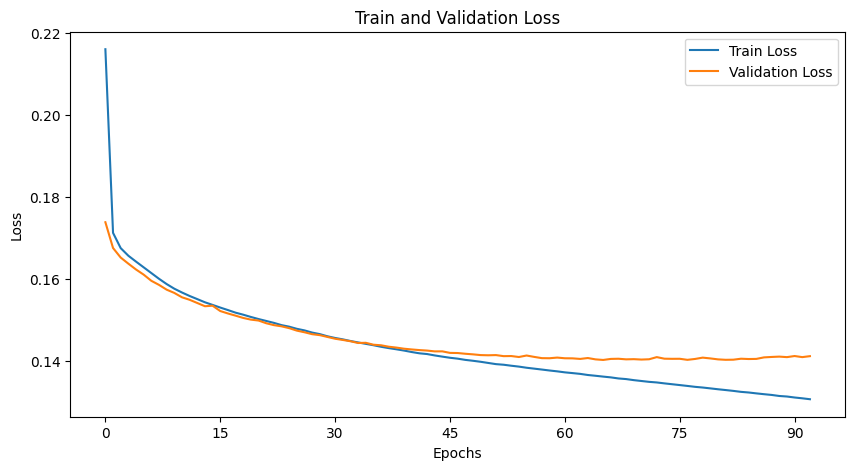

Epoch: 94, Train loss: 0.130, Val loss: 0.141, Epoch time = 7.572s


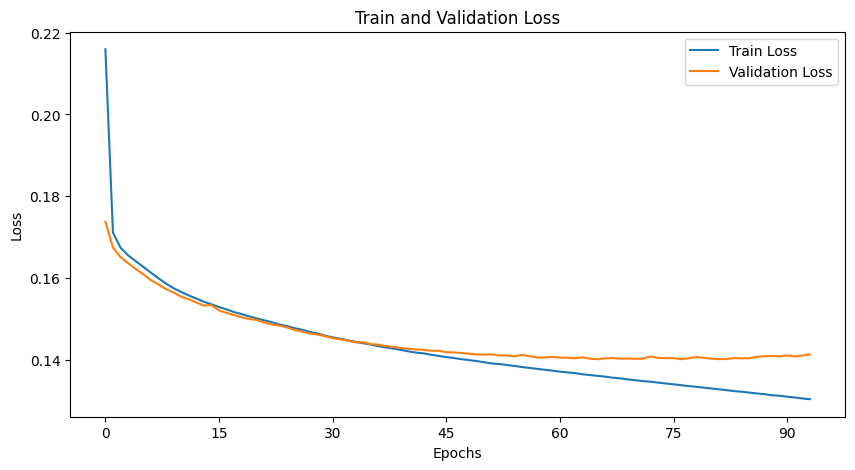

Epoch: 95, Train loss: 0.130, Val loss: 0.141, Epoch time = 7.588s


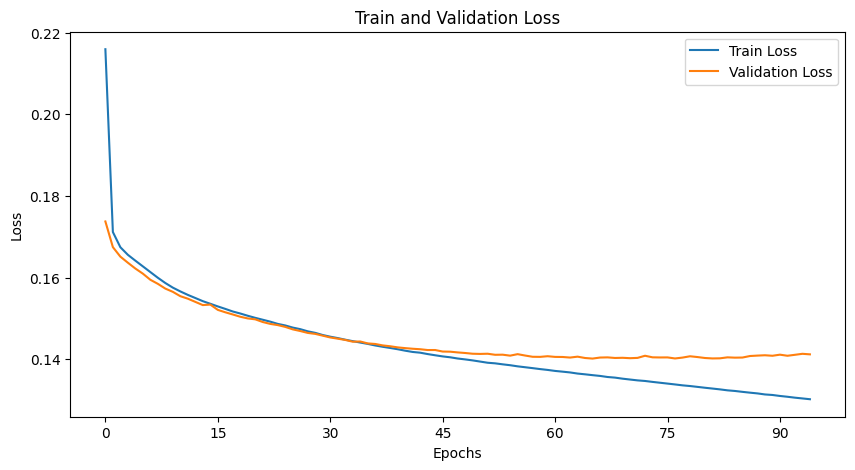

Epoch: 96, Train loss: 0.130, Val loss: 0.141, Epoch time = 7.575s


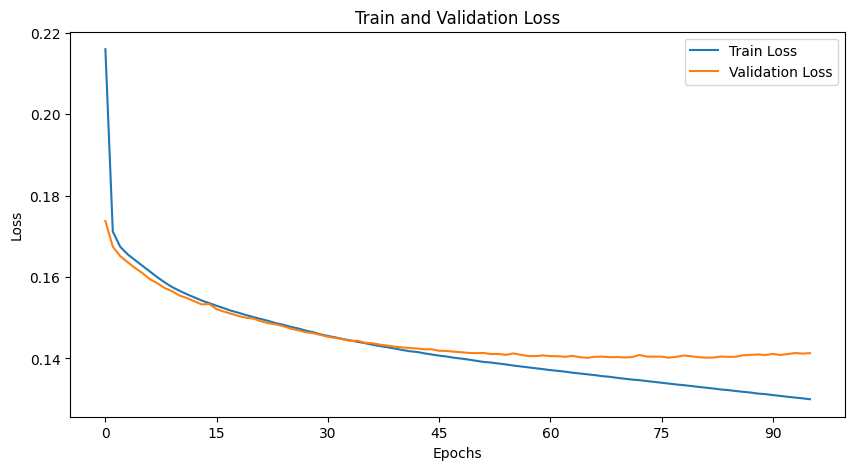

Epoch: 97, Train loss: 0.130, Val loss: 0.141, Epoch time = 7.587s


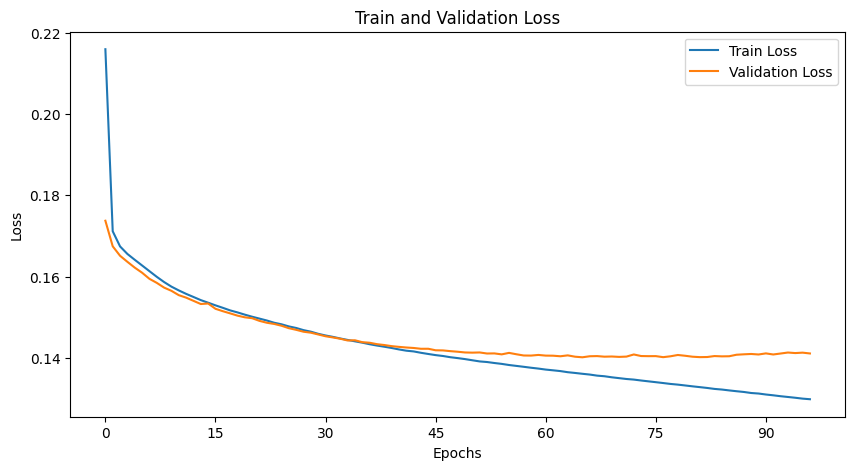

Epoch: 98, Train loss: 0.130, Val loss: 0.141, Epoch time = 7.596s


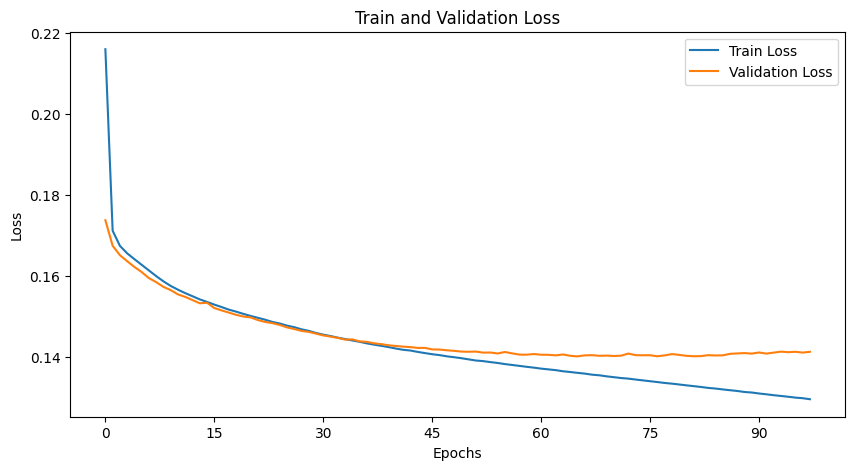

Epoch: 99, Train loss: 0.129, Val loss: 0.141, Epoch time = 7.582s


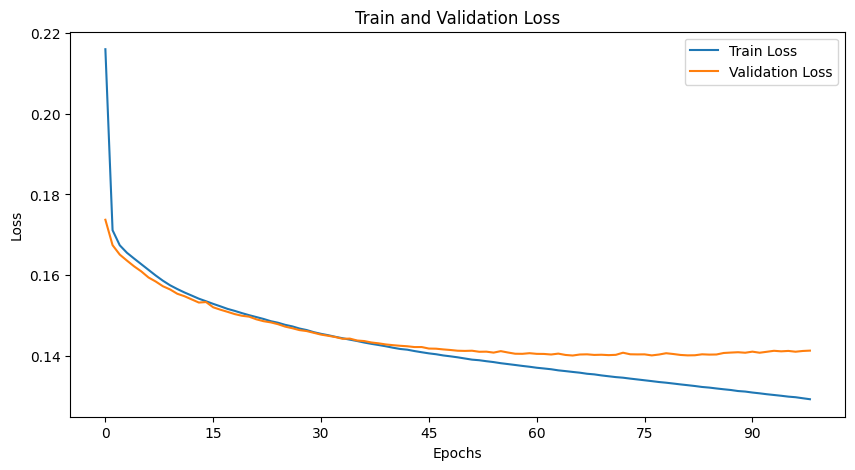

Epoch: 100, Train loss: 0.129, Val loss: 0.142, Epoch time = 7.566s


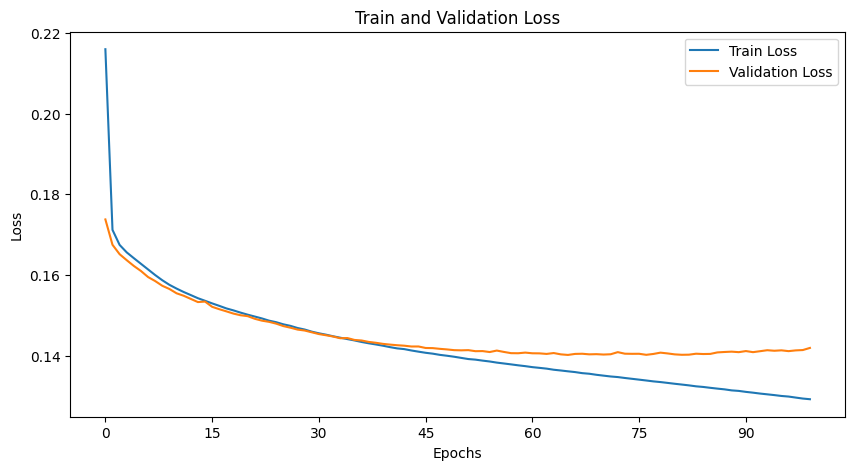

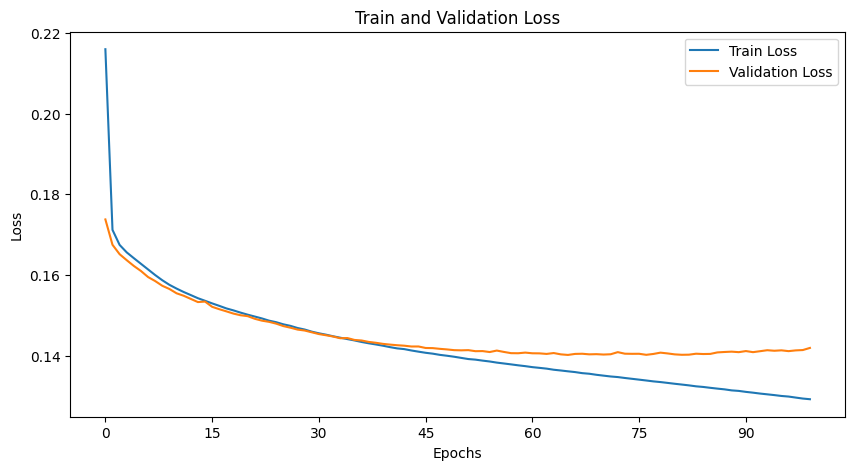

In [3]:
config = helper.create_json_template()

# Set model project name (for directory name)
config["model_project_name"] = "transformer_1.7"

# Set model parameters
config["model_params"]["num_emb"] = 24
config["model_params"]["hidden_size"] = 256
config["model_params"]["num_layers"] = 4
config["model_params"]["num_heads"] = 4
# config["model_params"]["output_dim"] = 10  can be set optionally

# Set training parameters
config["training_params"]["learning_rate"] = 0.0001
config["training_params"]["num_epochs"] = 100
config["training_params"]["optimizer"] = "Adam"
config["training_params"]["loss_fn"] = "BCEWithLogitsLoss"

# Set training data parameters
config["training_data_params"]["sos_token"] = [[1] * 24]
config["training_data_params"]["pad_token"] = [[2] * 24]
config["training_data_params"]["snapshot_interval"] = 0.1
config["training_data_params"]["batch_size"] = 32
config["training_data_params"]["sequence_length"] = 512
config["training_data_params"]["stride"] = 256
config["training_data_params"]["test_size"] = 0.2

config_path = helper.save_json_config(config, projects_path)

helper.train_model_from_config(str(config_path), dataset_dir, device)